<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Advanced Machine Learning: Credit Card Users Churn Prediction</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:1.5em;color:green">Muthuraman Muthusubramanian</span>

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Problem Statement</span>

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Installing necessary library versions**

In [ ]:
# verify the version numbers of packages installed.
!pip freeze | grep numpy
!pip freeze | grep pandas
!pip freeze | grep matplotlib
!pip freeze | grep seaborn
!pip freeze | grep scikit-learn
!pip freeze | grep scipy
!pip freeze | grep xgboost

numpy==1.26.4
geopandas==0.14.4
pandas==2.1.4
pandas-datareader==0.10.0
pandas-gbq==0.19.2
pandas-stubs==2.1.4.231227
sklearn-pandas==2.2.0
matplotlib==3.7.1
matplotlib-inline==0.1.7
matplotlib-venn==0.11.10
seaborn==0.13.1
scikit-learn==1.3.2
scipy==1.13.1
xgboost==2.1.1


In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas xgboost -q --user

In [ ]:
# Installing the libraries with the specified version.
!pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

### **Importing Libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### **Loading the dataset**

In [131]:
churn = pd.read_csv("https://raw.githubusercontent.com/aimlalchemists/credit-card-users-churn-prediction/main/BankChurners.csv")

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Data Overview</span>

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### **Checking the shape of the dataset**

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape

(10127, 21)

- The dataset has 10127 rows and 21 columns.

In [ ]:
# let's create a copy of the data
data = churn.copy()

### **Displaying the first few rows of the dataset**

In [ ]:
# let's view the first 5 rows of the data
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### **Checking the data types of the columns for the dataset**

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are missing values in the Education_Level and Marital_Status columns.
- Five columns are of object type, while the rest are numerical.

### **Checking for duplicate values**

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

### **Checking for missing values**

In [ ]:
# let's check for missing values in the data
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0


- Education_Level has 1519 missing values.
- Marital_Status has 749 missing values.

### **Statistical summary of the dataset**

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


### Observations

- **CLIENTNUM**: This unique identifier for customers can be dropped as it doesn't contribute to our analysis.
- **Customer_Age**: The average age of customers is 46 years, with ages ranging from 26 to 73 years.
- **Dependent_count**: On average, customers have 2 dependents, with a maximum of 5 dependents.
- **Months_on_book**: All customers have been with the bank for at least a year, and 50% have been customers for at least 3 years.
- **Total_Relationship_Count**: Every customer uses at least one bank product, while 75% use 5 or fewer products.
- **Months_Inactive_12_mon**: On average, customers were inactive for two months in the past year, indicating active engagement in transactions or card usage. It would be interesting to see if high inactivity correlates with customer churn.
- **Contacts_Count_12_mon**: On average, the bank and customers interacted twice in the past year.
- **Credit_Limit**: There is a significant difference between the third quartile and the maximum value. The credit limit ranges widely from 1438 to 34516, with high credit limits potentially indicating outliers.
- **Total_Revolving_Bal**: The average revolving balance is 1162, with little difference between the third quartile and the maximum value.
- **Avg_Open_To_Buy**: The average unused credit amount is 7469, with a wide range suggesting potential outliers at the extreme values.
- **Total_Amt_Chng_Q4_Q1**: For 75% of customers, the transaction amount in Q4 was less than in Q1, with a value around 0.9.
- **Total_Trans_Amt**: The average transaction amount over the last 12 months is 4404, with some customers spending as little as 510 and others more than 18,000.
- **Total_Trans_Ct**: On average, customers made 64 or fewer transactions, with 75% making up to 81 transactions.
- **Total_Ct_Chng_Q4_Q1**: For 75% of customers, the number of transactions in Q4 was less than in Q1.
- **Avg_Utilization_Ratio**: On average, customers used about 27% of their available credit, with 75% utilizing 50% or less.

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

### Observations
- Majority of the records belongs to existing customers.
- There are missing values.
- Most customers are married.
- Most customers have Blue card.
- Majority of the customers belong to less than $40k category.
- Most of the bank's customers are female.
- Significant number of customers are graduates.
- "abc" is not a correct value for Income_Category.

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Exploratory Data Analysis</span>

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Combine a boxplot and histogram for a given feature.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    feature (str): The column to plot.
    figsize (tuple): The size of the figure (default is (12, 7)).
    kde (bool): Whether to show the density curve (default is False).
    bins (int): The number of bins for the histogram (default is None).
    """

    # Create a 2-row subplot grid with shared x-axis
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows in the subplot grid
        sharex=True,  # Share the x-axis among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},  # Set height ratios for the subplots
        figsize=figsize,  # Set the figure size
    )

    # Create a boxplot for the feature
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # Show means with a triangle indicator

    # Create a histogram for the feature
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2
        )

    # Add a vertical line for the mean value
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )

    # Add a vertical line for the median value
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Create a bar plot with labels showing either counts or percentages.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    feature (str): The column to plot.
    perc (bool): Whether to display percentages instead of counts (default is False).
    n (int): The number of top category levels to display (default is None, i.e., display all levels).
    """

    # Calculate the total number of entries in the feature column
    total = len(data[feature])

    # Get the number of unique categories in the feature column
    count = data[feature].nunique()

    # Set the figure size based on the number of categories or the specified top n categories
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90, fontsize=15)

    # Create a count plot for the feature column
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    # Annotate each bar with the count or percentage
    for p in ax.patches:
        if perc:
            # Calculate the percentage for each category
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            # Use the count for each category
            label = p.get_height()

        # Calculate the position for the annotation
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Annotate the bar with the label
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    # Display the plot
    plt.show()

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    predictor (str): The independent variable.
    target (str): The target variable.
    """
    # Get the number of unique categories in the predictor variable
    count = data[predictor].nunique()

    # Determine the category with the least frequency in the target variable
    sorter = data[target].value_counts().index[-1]

    # Create a crosstab of predictor and target, including margins, and sort by the least frequent target category
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    # Print the crosstab table
    print(tab1)
    print("-" * 120)

    # Create a normalized crosstab of predictor and target, and sort by the least frequent target category
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    # Plot the normalized crosstab as a stacked bar chart
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))

    # Adjust the legend position
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

    # Display the plot
    plt.show()


In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):
    """
    Plot the distribution and boxplots of a predictor variable with respect to the target variable.

    Parameters:
    data (DataFrame): The dataframe containing the data.
    predictor (str): The predictor variable.
    target (str): The target variable.
    """

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Get the unique values of the target variable
    target_uniq = data[target].unique()

    # Plot the distribution of the predictor for the first target category
    axs[0, 0].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    # Plot the distribution of the predictor for the second target category
    axs[0, 1].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    # Plot the boxplot of the predictor with respect to the target variable
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    # Plot the boxplot of the predictor with respect to the target variable, excluding outliers
    axs[1, 1].set_title("Boxplot of " + predictor + " (without outliers) w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    # Adjust the layout to prevent overlap
    plt.tight_layout()

    # Display the plots
    plt.show()


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Univariate analysis</span>

### **Observations on Customer_Age**

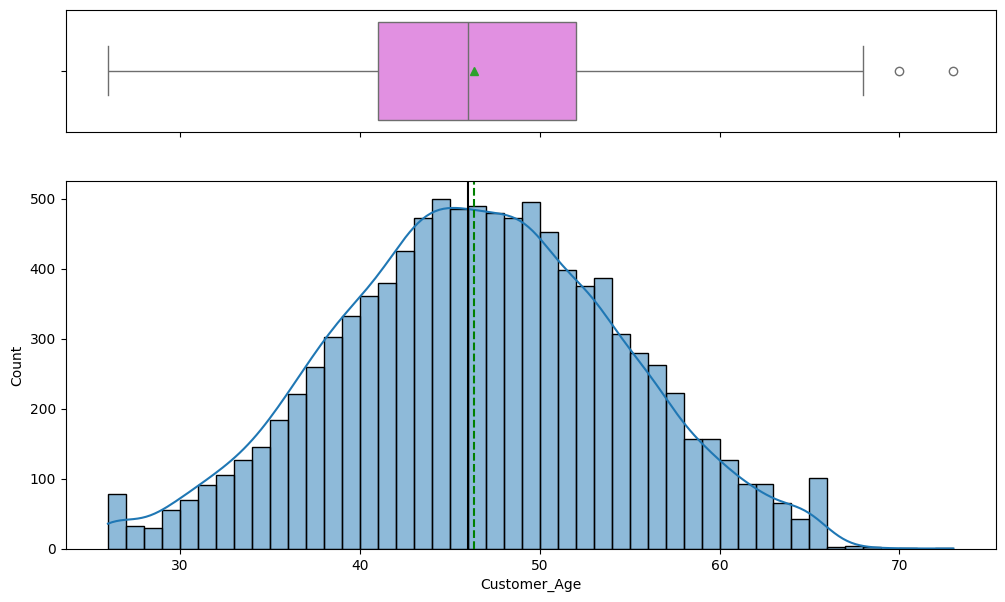

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)

- The distribution of Customer_Age follows a normal pattern, with both the mean and median at 46 years.
- The boxplot reveals the presence of a few outliers

### **Observations on Months_on_book**

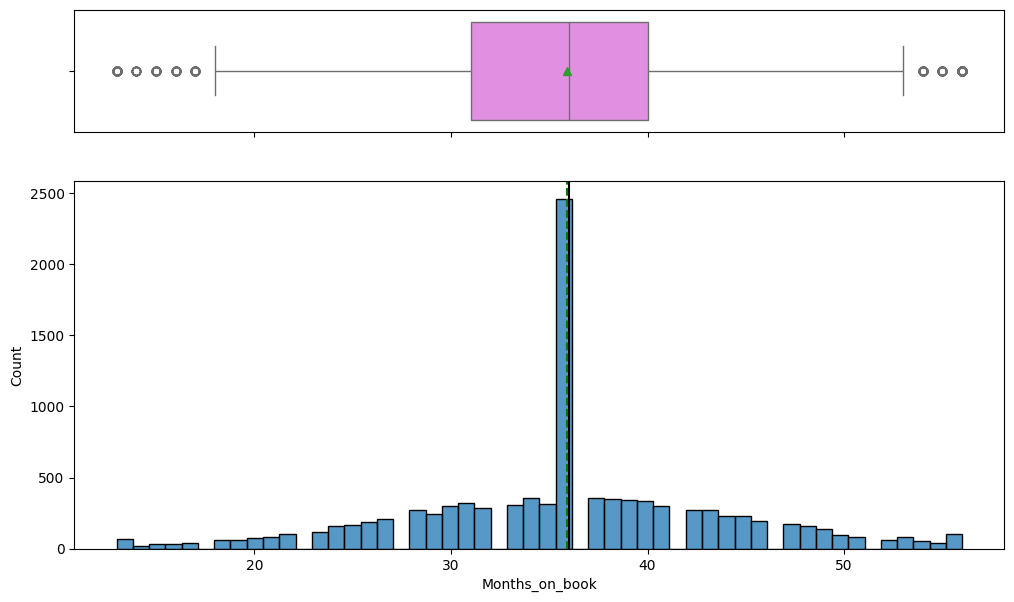

In [ ]:
histogram_boxplot(data, "Months_on_book")

- Most customers have been with the bank for 3 years.
- The boxplot indicates the presence of outliers on both ends of the whiskers.

### **Observations on Credit_Limit**

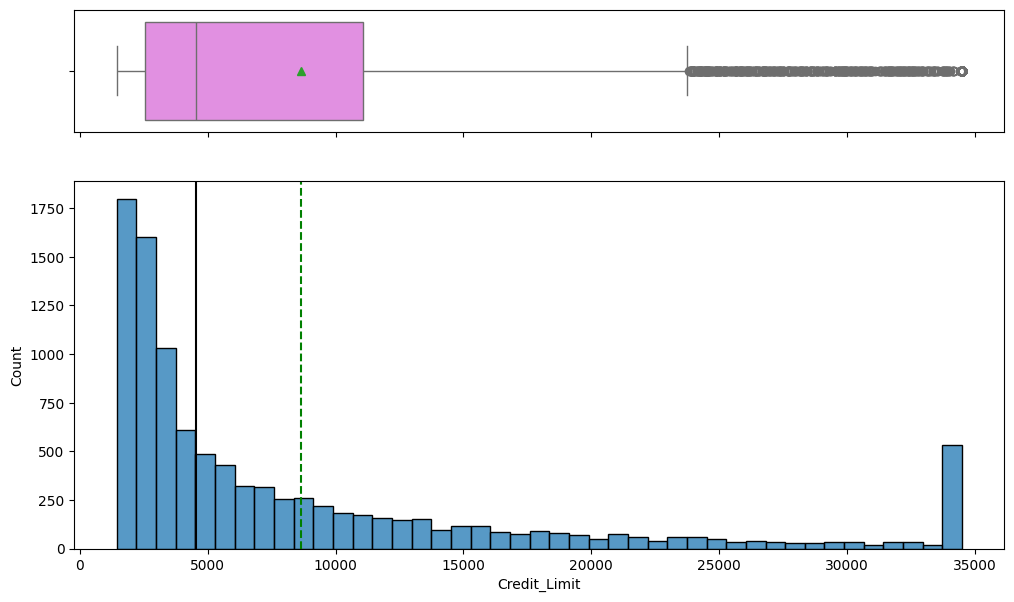

In [ ]:
histogram_boxplot(data, "Credit_Limit")

- The Credit_Limit distribution is right-skewed, with several customers having a maximum limit of 35,000.
- Additionally, 50% of the bank’s customers have a credit limit below 5,000.

### **Observations on Total_Revolving_Bal**

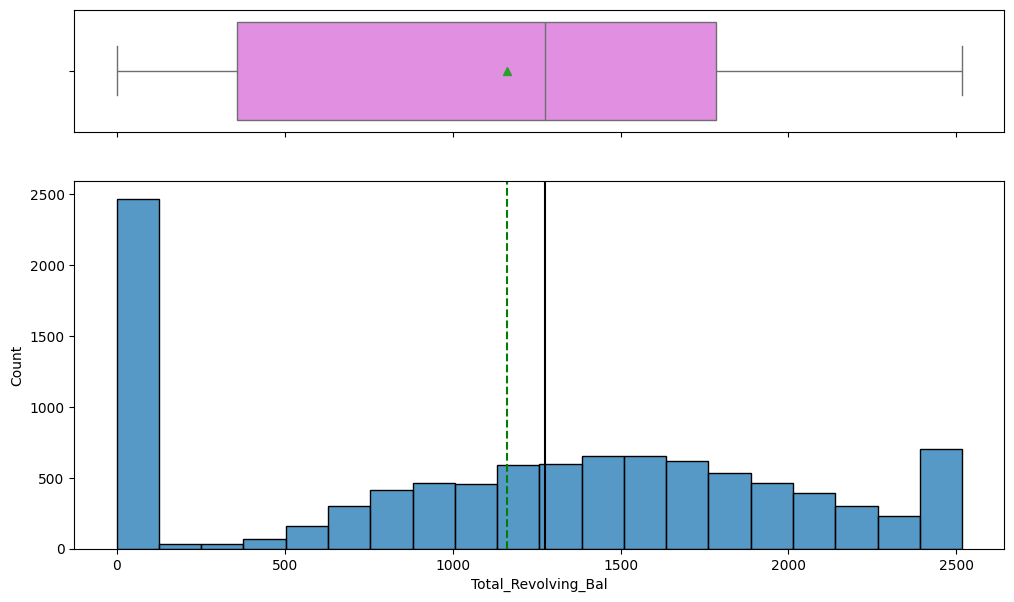

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Most customers pay their complete credit card dues and have a revolving balance of 0.
- Quite a few customers have a revolving balance of $2,500.

### **Observations on Avg_Open_To_Buy**

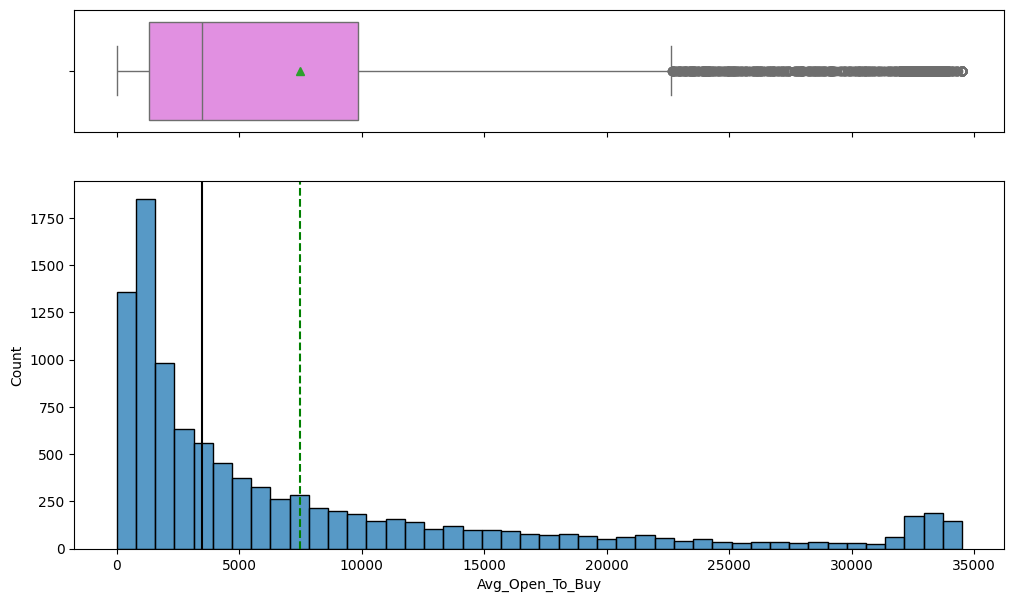

In [ ]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- The distribution of the Avg_Open_To_Buy column is right-skewed.
- This right-skewed distribution indicates that most customers have used a significant portion of their credit limit.
- Only a few customers (on the right tail) have a majority of their credit amount remaining.

### **Observations on Total_Trans_Ct**

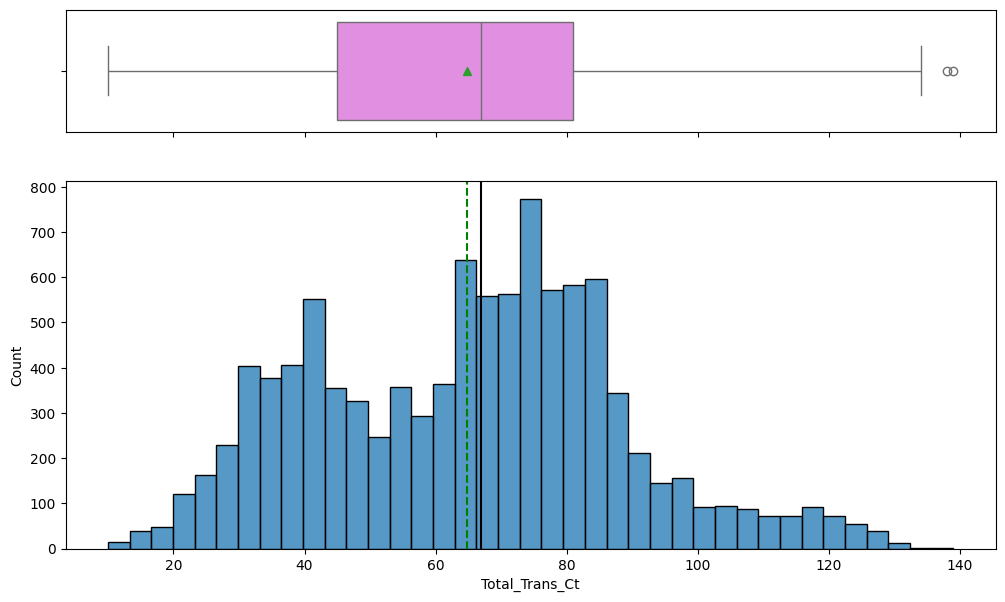

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct")

- The distribution of Total_Trans_Ct has two peaks at 40 and 80 transactions per year.
- This suggests that customers typically use their credit cards 3 to 6 times per month for transactions.

### **Observations on Total_Amt_Chng_Q4_Q1**

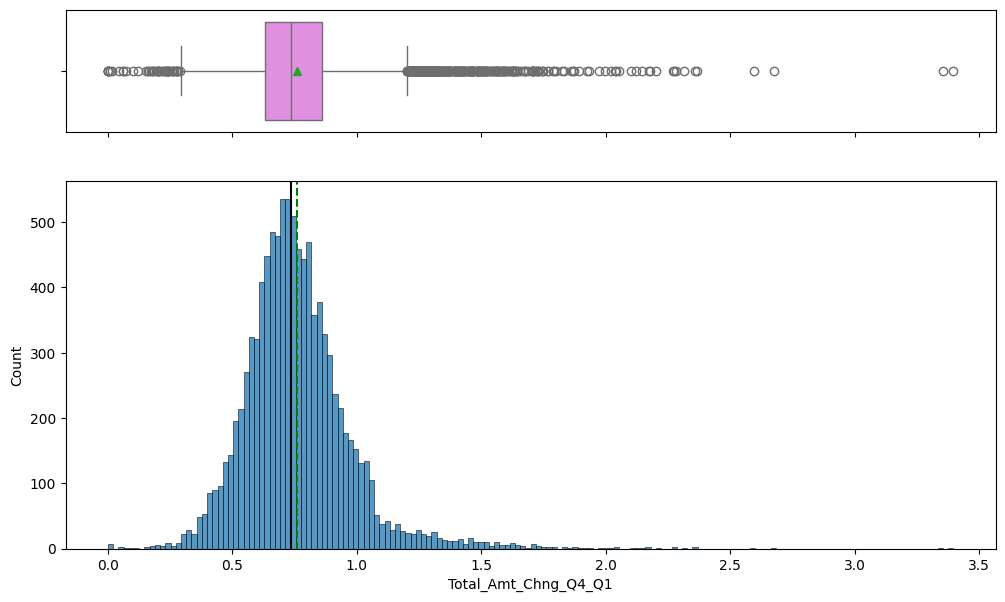

In [ ]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- The distribution of Total_Amt_Chng_Q4_Q1 appears to be normally distributed with a slight right skew.
- The boxplot reveals outliers on both sides of the whiskers.

### **Observations on Total_Trans_Amt**

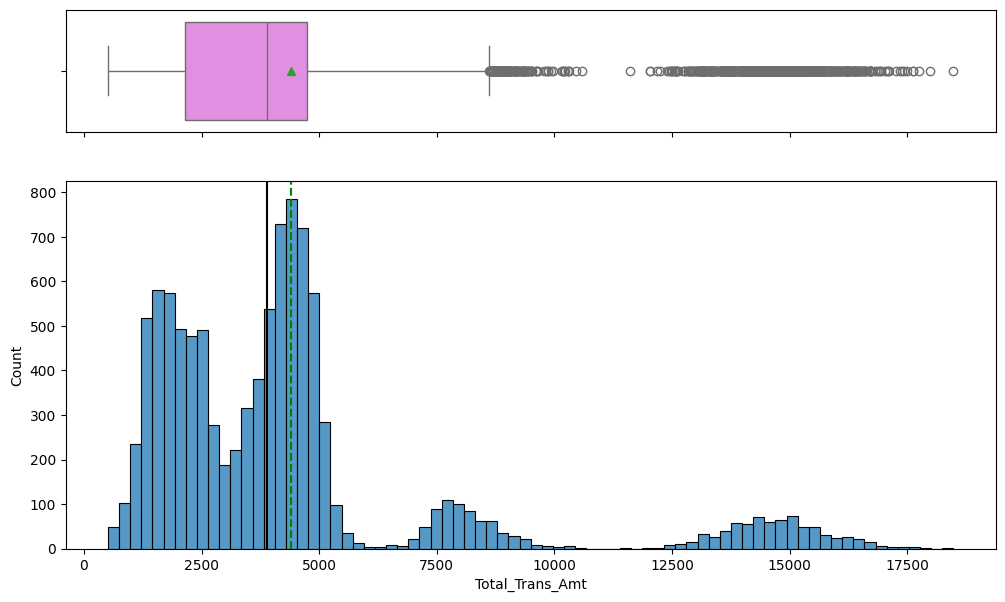

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt")

- The distribution of Total_Trans_Amt is right-skewed.
- There are two peaks in the data: one around 2,500 and another near the mean value of approximately 4,500.
- The boxplot shows outliers, with customers having total transaction amounts exceeding ~8,000 being considered outliers.
- It would be interesting to investigate whether customers spending less are churning or if those spending more are churning. If the latter is true, the bank could be losing valuable customers.

### **Observations on Total_Ct_Chng_Q4_Q1**

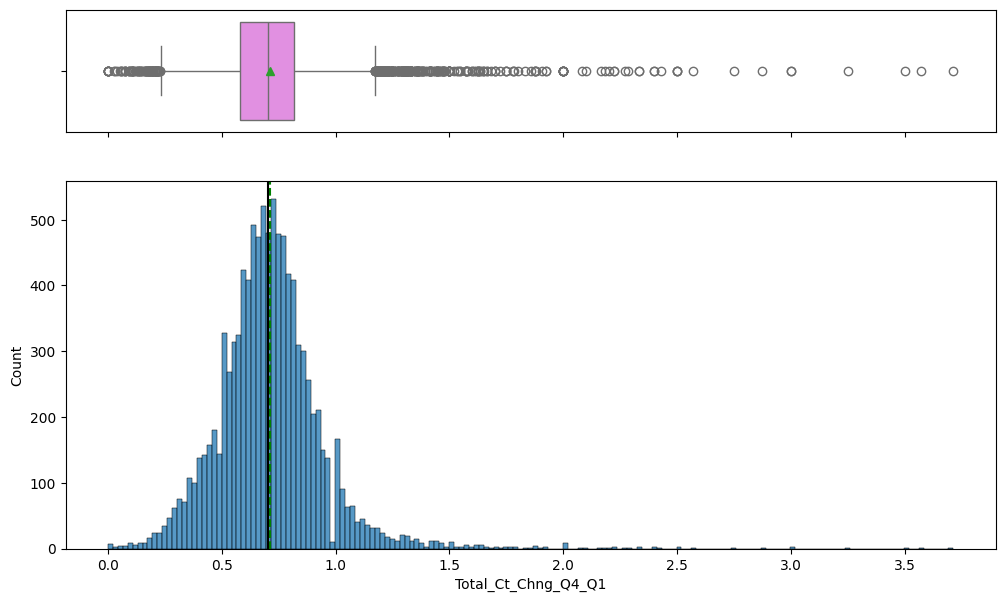

In [ ]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- The distribution of Total_Ct_Chng_Q4_Q1 appears to be normally distributed with a slight right skew.
- The boxplot indicates outliers on both sides of the whiskers.

### **Observations on Avg_Utilization_Ratio**

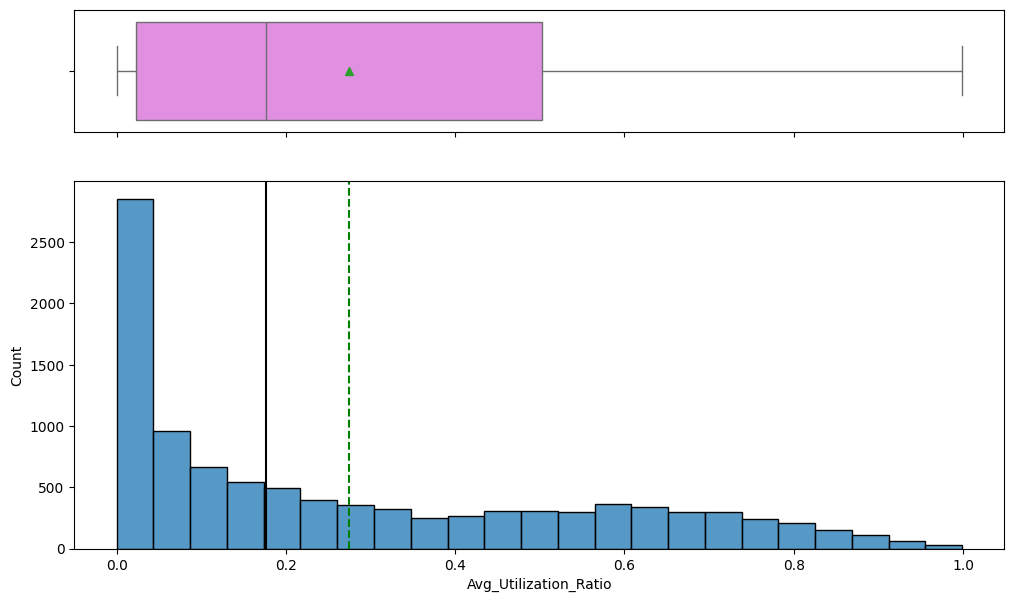

In [ ]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

- The distribution of Avg_Utilization_Ratio is right-skewed.
- This indicates a potential issue for the bank, as most customers are not fully utilizing their credit limits.

### **Observations on Dependent_count**

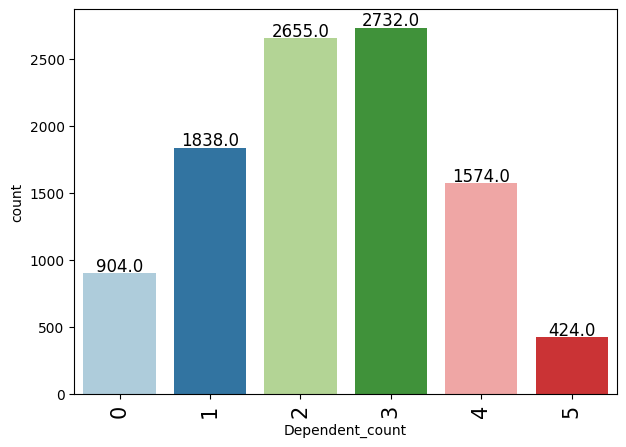

In [ ]:
labeled_barplot(data, "Dependent_count")

- The distribution of dependents is quite realistic, with most customers having 2 or 3 dependents.

### **Observations on Total_Relationship_Count**

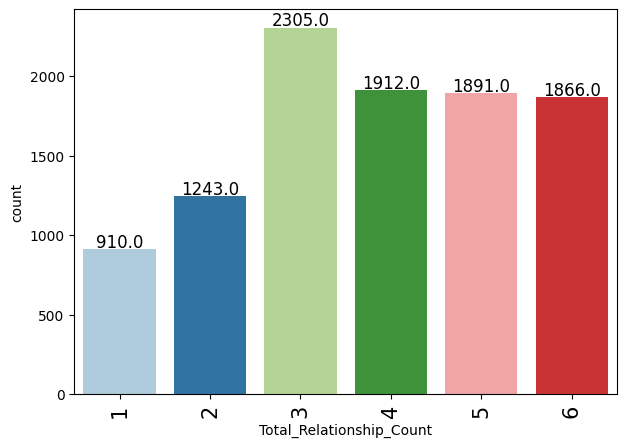

In [ ]:
labeled_barplot(data, "Total_Relationship_Count")

- 22.8% of customers use 3 products offered by the bank, while approximately 19% use 4 or more products.
- The equal percentage of customers using 4, 5, and 6 products suggests that those who opt for a 4th product are likely to be interested in purchasing additional products.

### **Observations on Months_Inactive_12_mon**

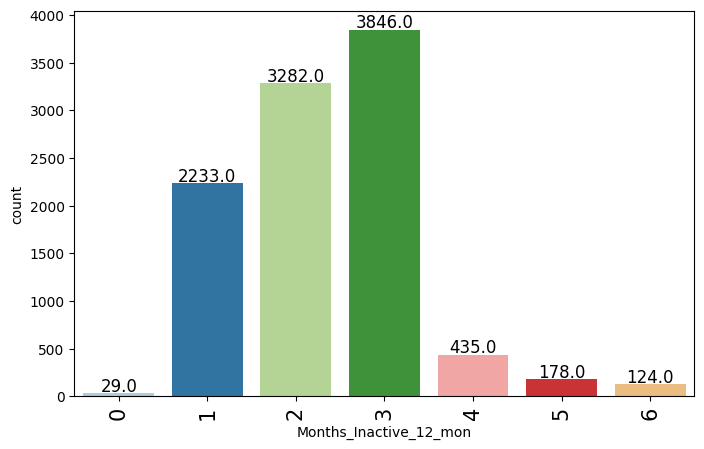

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon")

- Only 7.5% of the customers were inactive for more than 3 months.

### **Observations on Contacts_Count_12_mon**

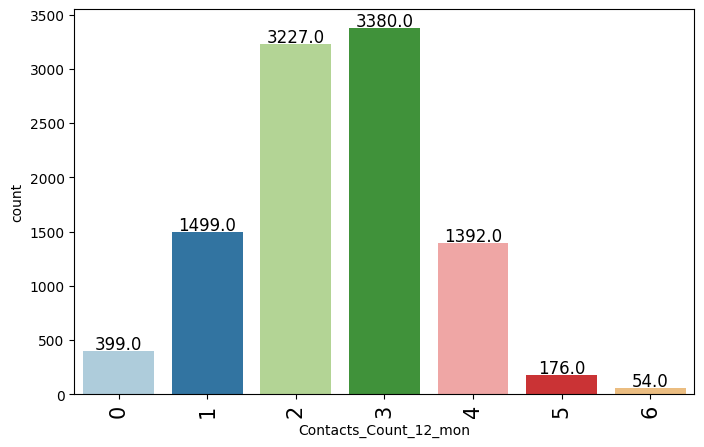

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon")

- Approximately 16% of customers engaged with the bank over three times in the last year.

### **Observations on Gender**

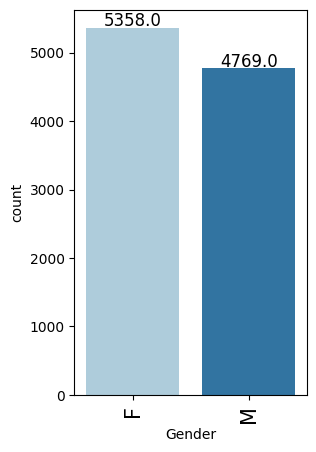

In [ ]:
labeled_barplot(data, "Gender")

- Female customers are higher than Male customers.

### **Observations on Education_Level**

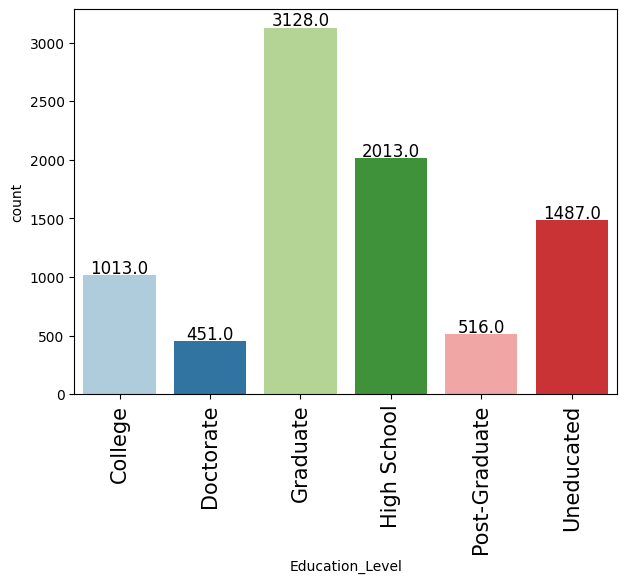

In [ ]:
labeled_barplot(data, "Education_Level")

- 30.9% of customers hold a graduate degree, while 19.9% have completed high school.
- The Education_Level column has a 15% rate of missing values.

### **Observations on Marital_Status**

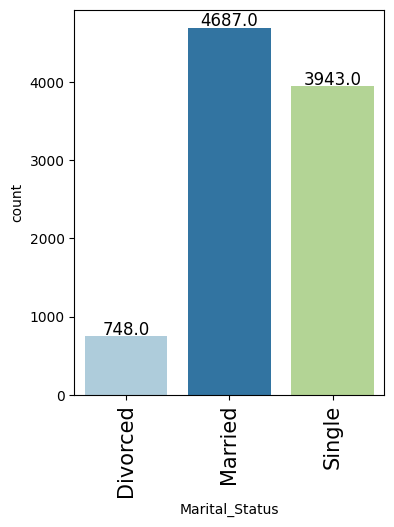

In [ ]:
labeled_barplot(data, "Marital_Status")

- 46.3% of customers are married, while 38.9% are single.
- The Marital_Status column has a 7.4% rate of missing values.

### **Observations on Income_Category**

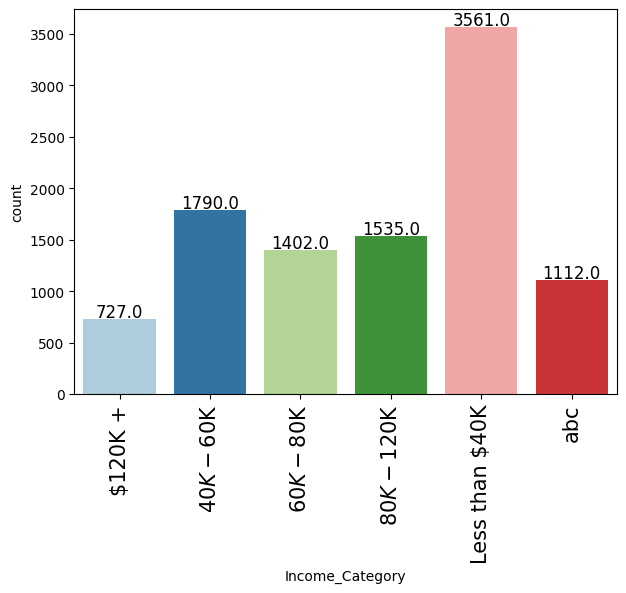

In [ ]:
labeled_barplot(data, "Income_Category")

- 35.2% of customers fall into the “Less than 40k” income category, followed by 17.7% in the “40k-60k” income group.
- The Income_Category column has an 11% rate of missing values.

### **Observations on Card_Category**

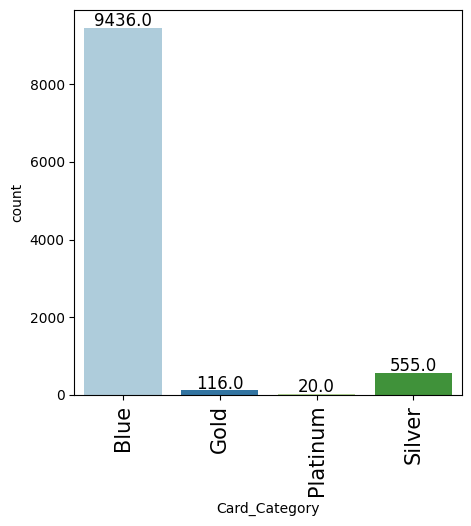

In [ ]:
labeled_barplot(data, "Card_Category")

- 93.2% of the customers have the Blue card.
- Blue card would be a standard card given by the bank to all its customers.

### **Observations on Attrition_Flag**

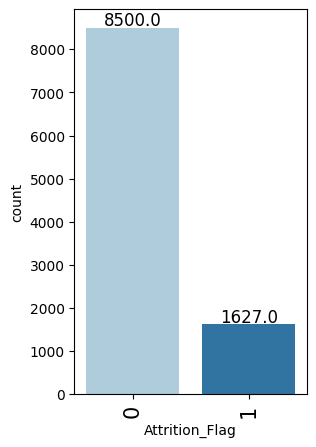

In [ ]:
labeled_barplot(data, "Attrition_Flag")

- 16.1% of customers have attrited, highlighting an imbalance in the data.

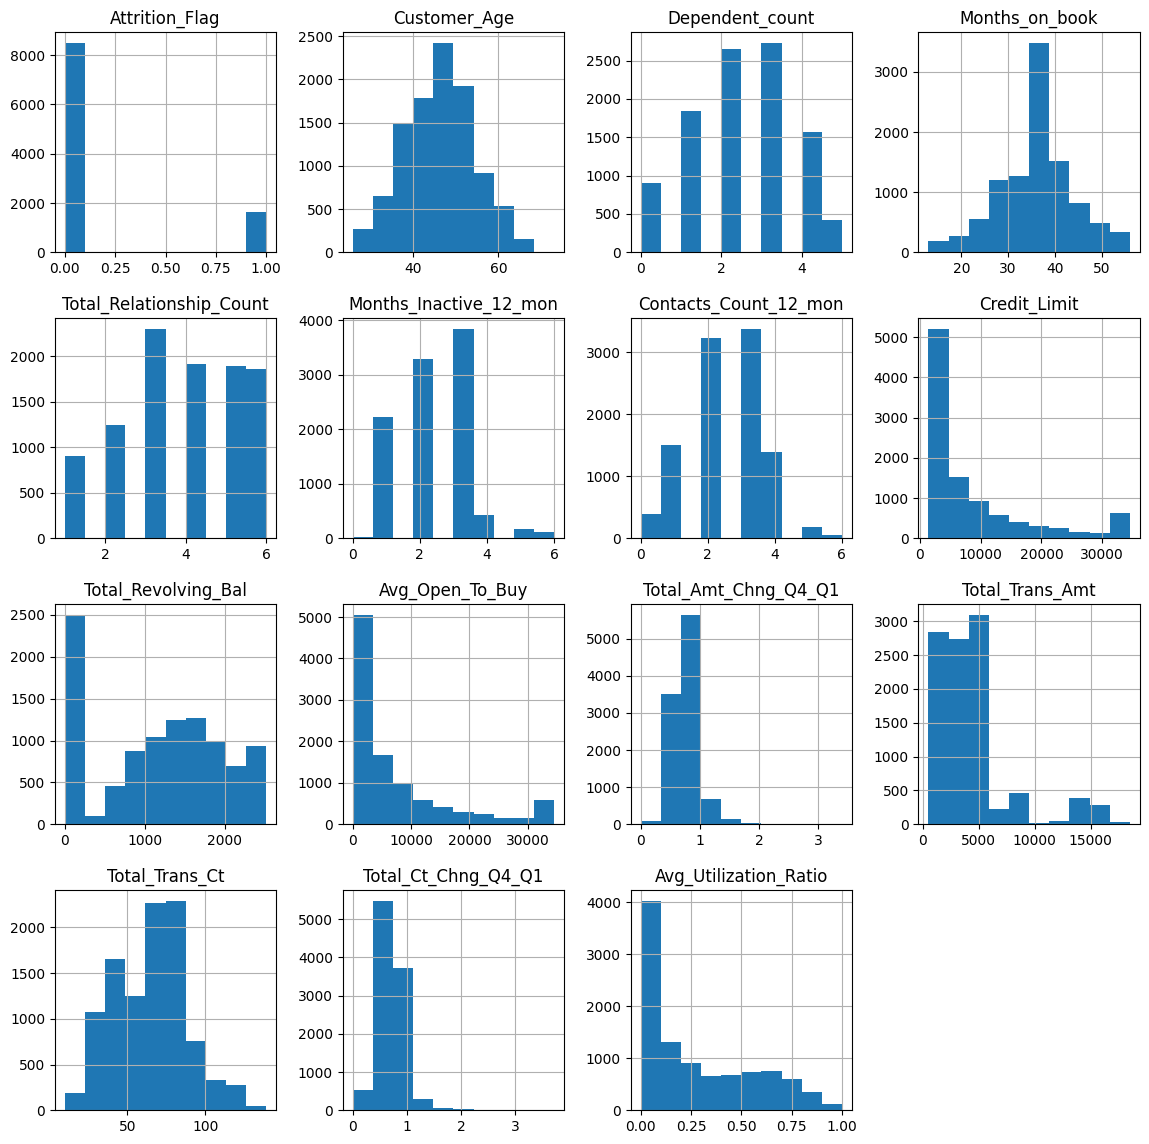

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Bivariate Distributions</span>

**Let's see the attributes that have a strong correlation with each other**

### **Correlation Check**

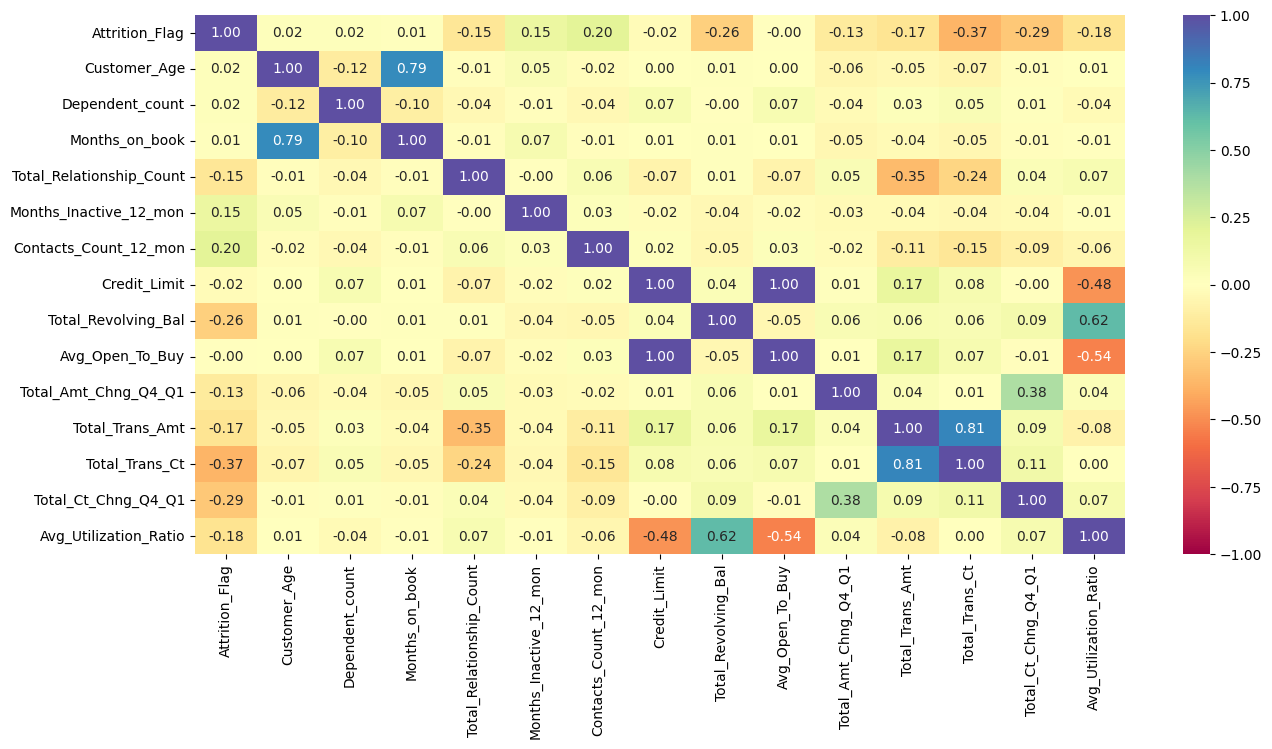

In [ ]:
# Set the size of the figure
plt.figure(figsize=(15, 7))

# Filter out non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[float, int])

# Create a heatmap of the correlation matrix of the numeric data
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

# Display the heatmap
plt.show()

There is a strong positive correlation between:

- Months_on_book and Customer_Age
- Total_Revolving_Bal and Avg_Utilization_Ratio
- Total_Trans_Amt and Total_Trans_Ct

Additionally, Total_Relationship_count shows a negative correlation with both Total_Trans_Amt and Total_Trans_Ct, while Avg_Utilization_Ratio is negatively correlated with Credit_Limit and Avg_Open_To_Buy

### **Observations on Attrition_Flag vs Gender**

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


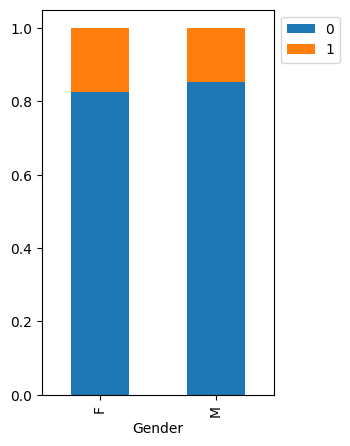

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

- The attrition percentages for Males and Females are quite similar.
- Approximately 20% of both Males and Females have attrited.

### **Observations on Attrition_Flag vs Marital_Status**

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


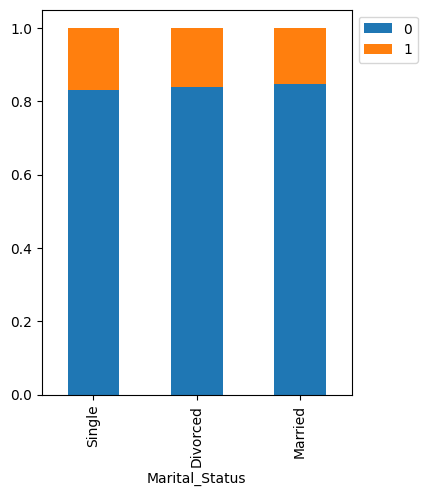

In [ ]:
stacked_barplot(data, "Marital_Status", "Attrition_Flag")

- The attrition percentages for different marital statuses are quite similar.
- Approximately 20% of single and divorced customers attrite, while married customers have the lowest attrition rate.

### **Observations on Attrition_Flag vs Education_Level**


Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


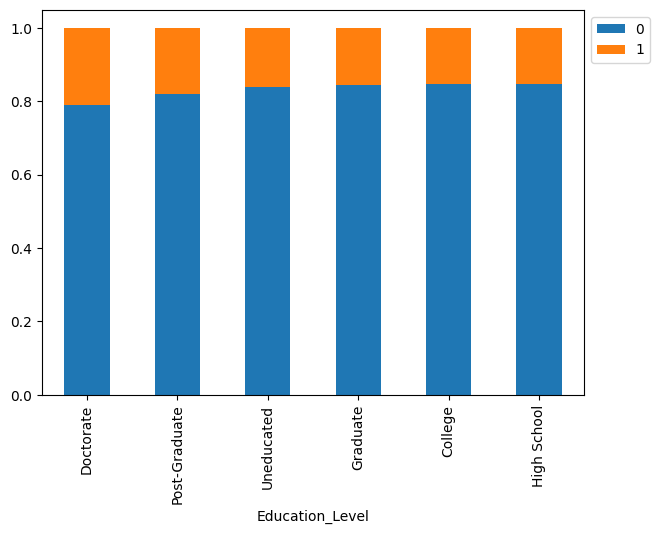

In [ ]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")

- Customers with higher education levels, such as Doctorates and Post Graduates, have the highest attrition rates, with approximately 20% for both groups.

### **Observations on Attrition_Flag vs Income_Category**

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


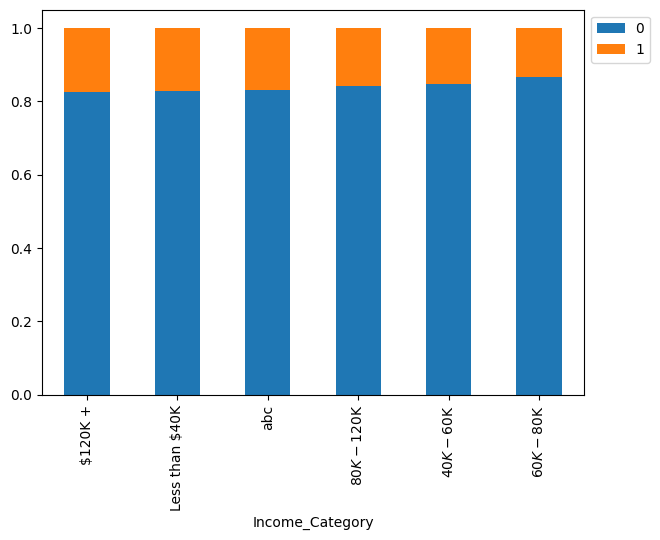

In [ ]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")

- Customers from the two extreme income groups—those earning less than 40K and those earning more than 120K—have the highest attrition rates

### **Observations on Attrition_Flag vs Card_Category**

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
------------------------------------------------------------------------------------------------------------------------


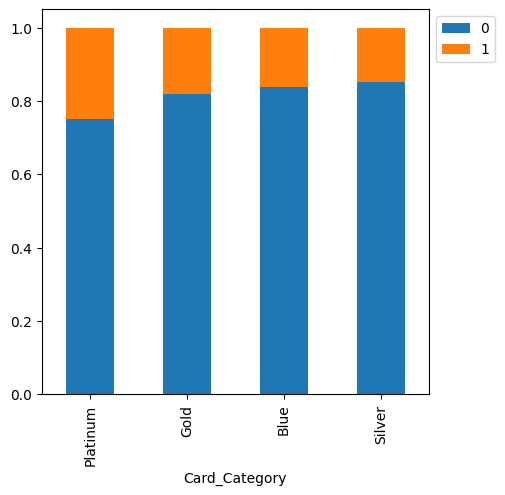

In [ ]:
stacked_barplot(data, "Card_Category", "Attrition_Flag")

- Approximately 35% of attrition occurs among customers with Platinum cards, followed by around 30% among those with Gold cards.
- These Platinum and Gold cardholders are our premium customers, and the high attrition rates in these groups are concerning, given they are using the bank’s premium cards.

### **Observations on Attrition_Flag vs Contacts_Count_12_mon**

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


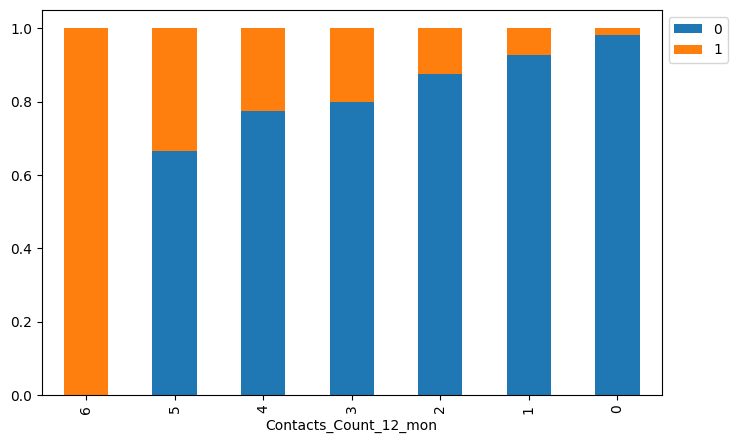

In [ ]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")

- The highest attrition rates are among customers who have interacted with the bank the most.
- This indicates that the bank is failing to resolve the issues faced by these customers, leading to their attrition.
- As a preliminary step, identifying customers who have frequently reached out to the bank could help in pinpointing those at risk of attrition.

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

### **Attrition_Flag vs Months_Inactive_12_mon**

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


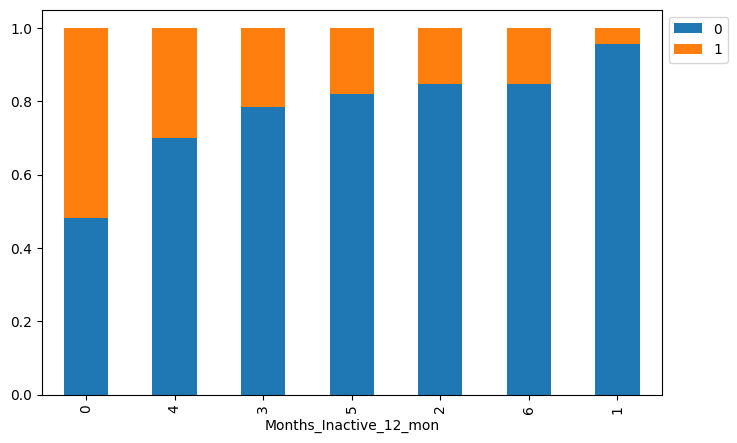

In [ ]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")

- As inactivity increases, so does attrition, particularly within the 2-4 month range.
- However, interpreting the data for 0 and 6 months is challenging.
- Customers who recently used their cards have the highest attrition rates, while those inactive for 6 months have lower attrition rates.”

### **Observations on Attrition_Flag vs Total_Relationship_Count**

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


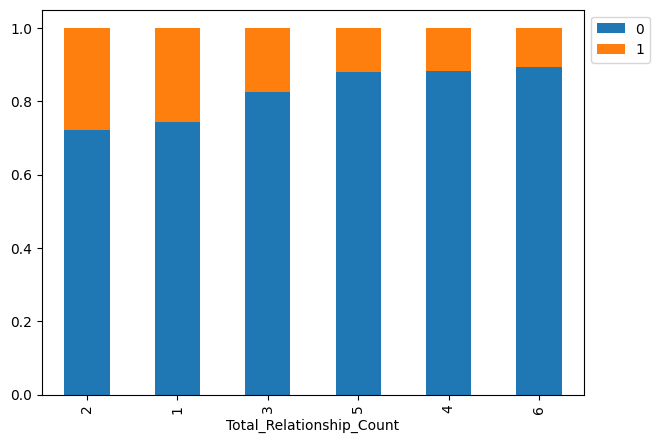

In [ ]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")

- Attrition is highest among customers using only 1 or 2 products from the bank, accounting for approximately 55% of total attrition.
- In contrast, customers who use more than 3 products have the lowest attrition rates.
- These customers may be more financially stable and actively engaged with various bank services.

### **Observations on Attrition_Flag vs Dependent_count**

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


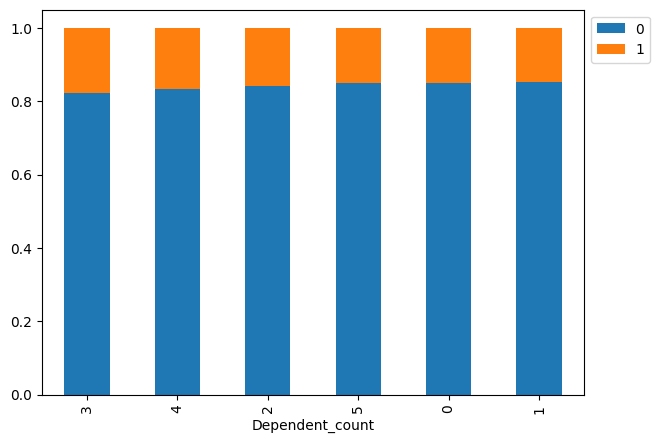

In [ ]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")

- The higher the number of dependents, the greater the attrition, as increased responsibilities may lead to financial instability.
- Conversely, attrition is relatively low among customers with 0 or 1 dependent.

### **Observations on Total_Revolving_Bal vs Attrition_Flag**

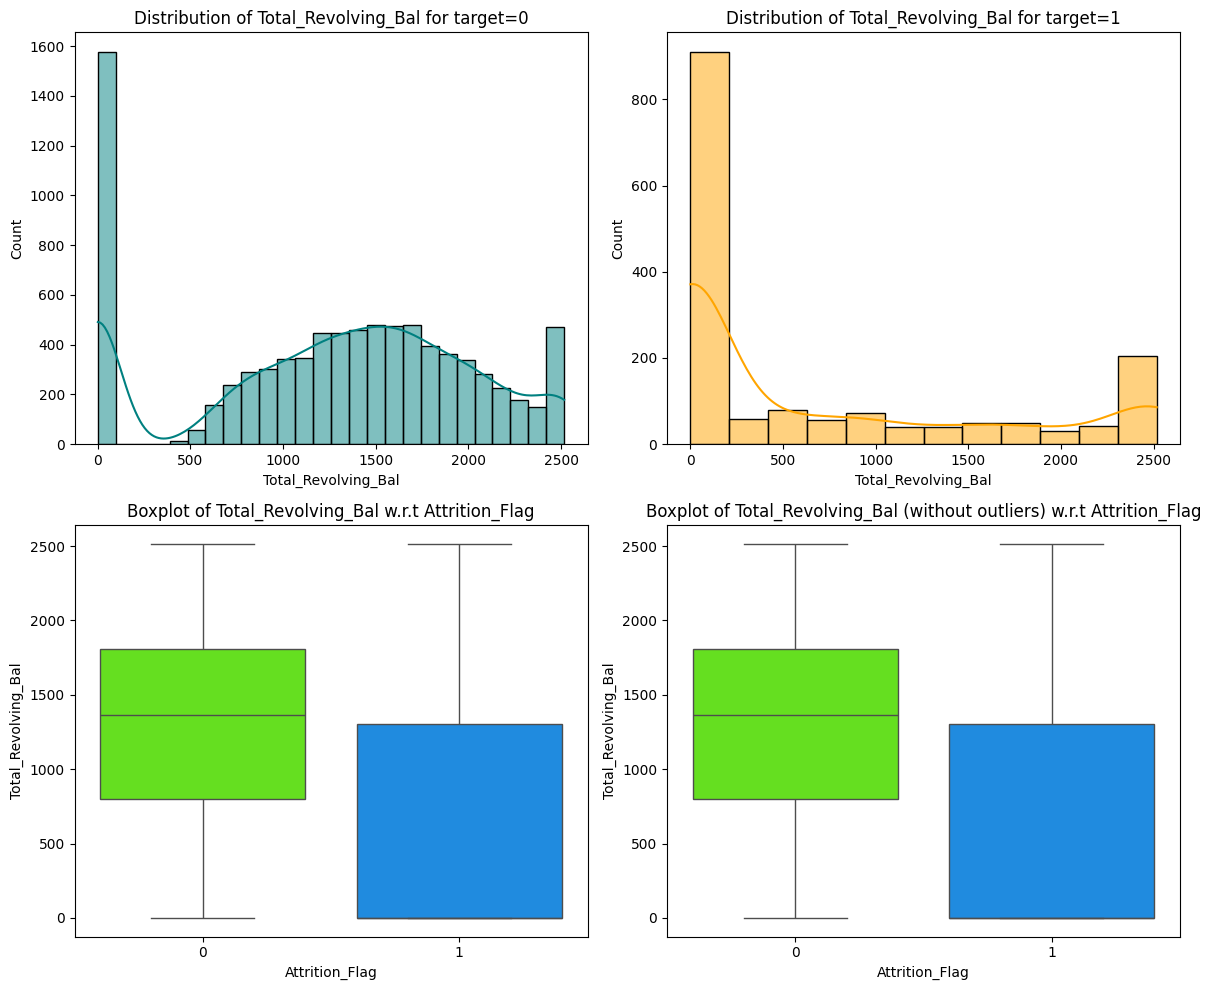

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

- Customers who have a lower overall revolving balance are the ones who have discontinued their service.
- It's likely that these customers have settled their outstanding balances and chosen to cancel their credit card service.

### **Observations on Attrition_Flag vs Credit_Limit**

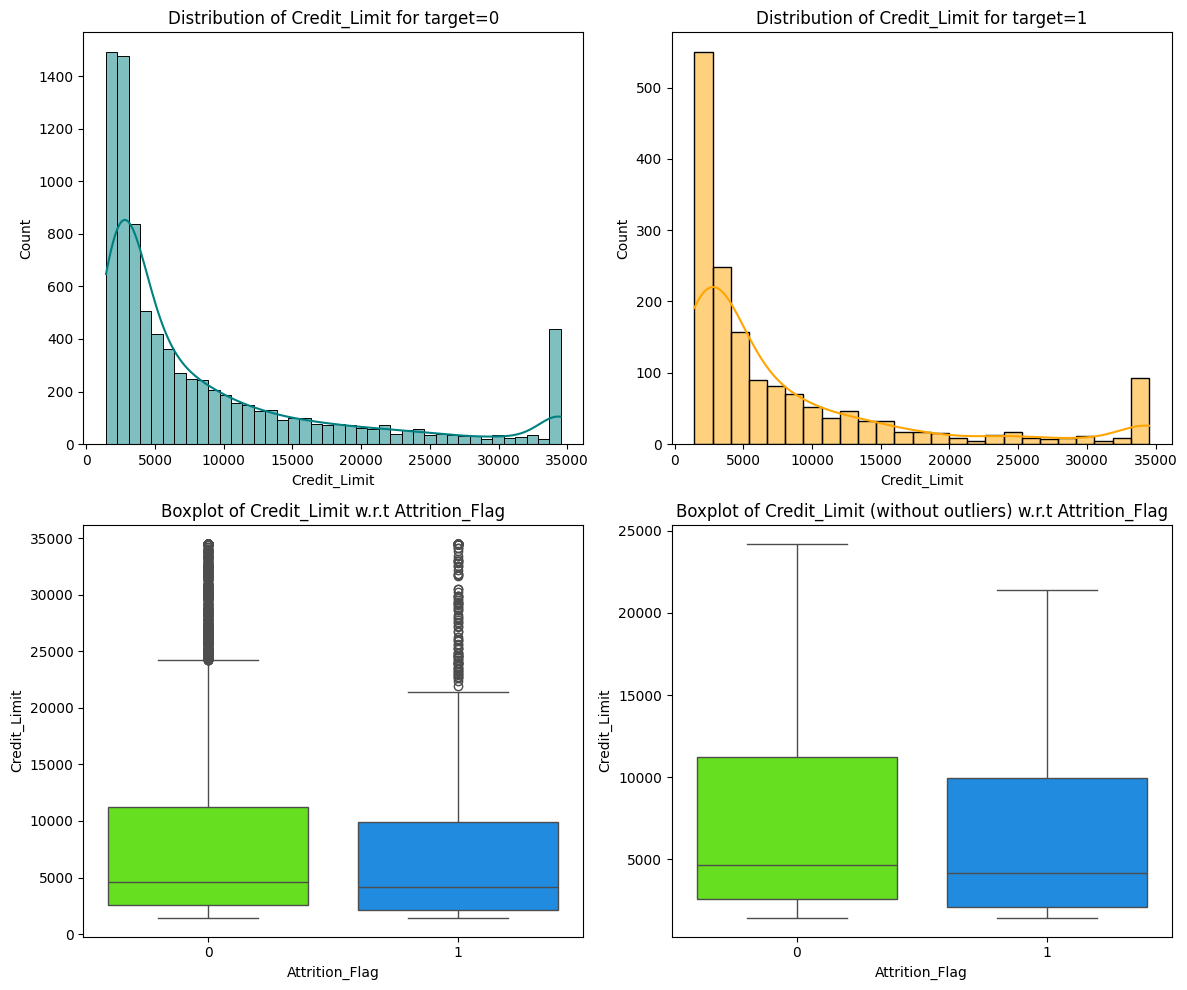

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

- Customers who have lower credit limits are the ones who have discontinued their service.

### **Observations on Attrition_Flag vs Customer_Age**

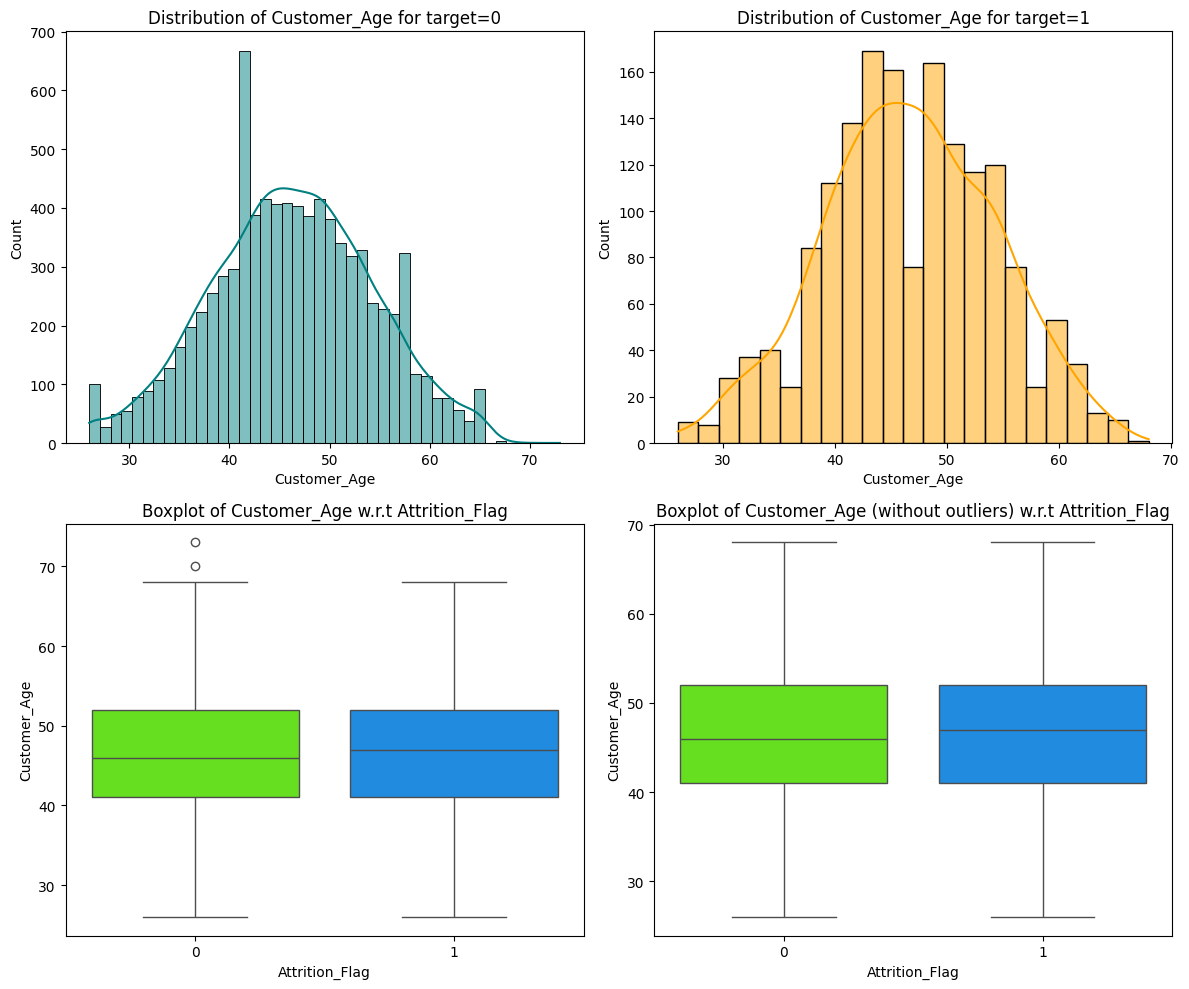

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

- The age of customers who discontinued their service and those who didn't shows no difference.

### **Observations on Total_Trans_Ct vs Attrition_Flag**

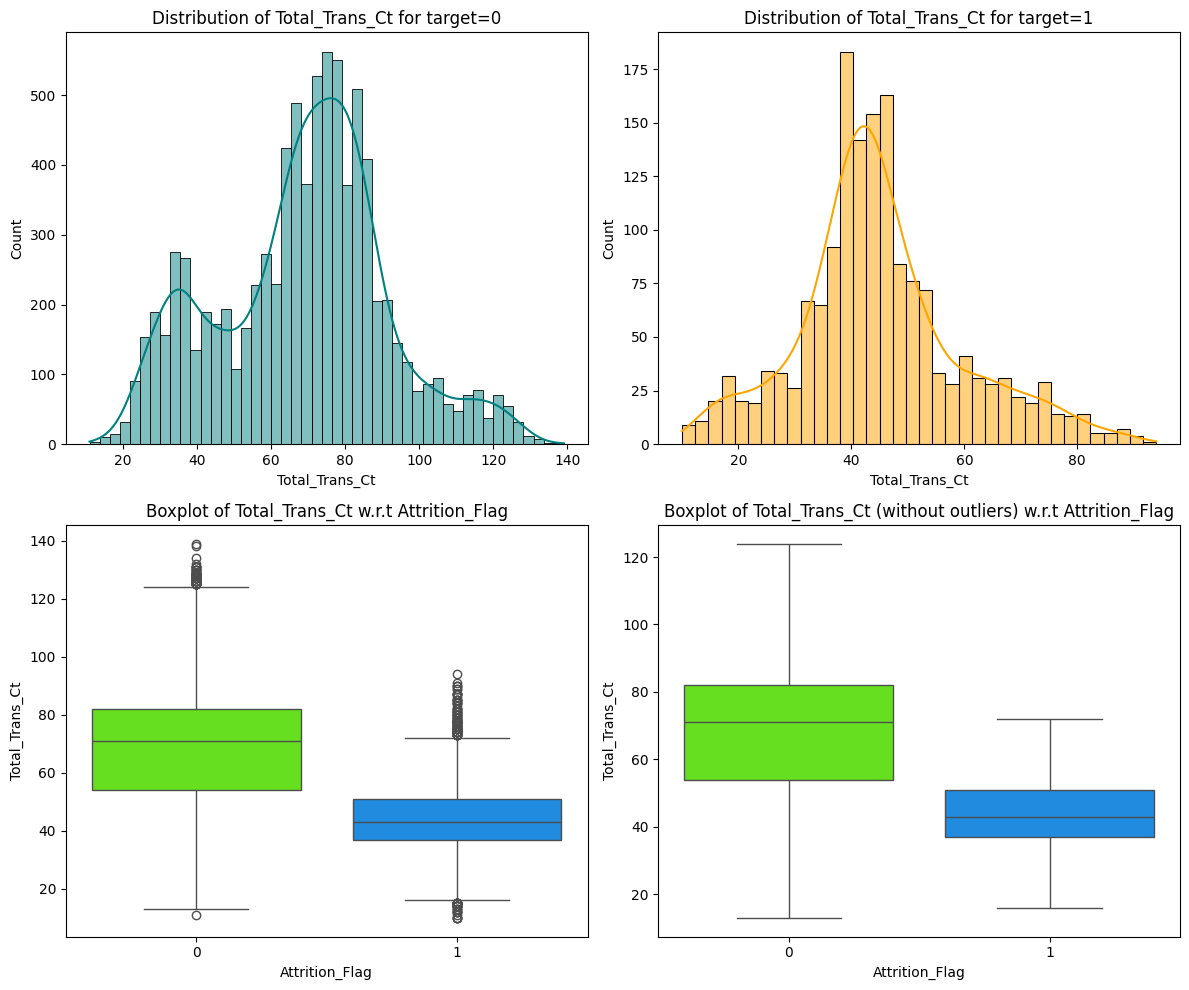

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")

- A lower number of transactions tends to result in higher attrition.
- Customers who make between 80 to 100 transactions, or have a median of 40 transactions per year, should be given more attention.

### **Observations on Total_Trans_Amt vs Attrition_Flag**

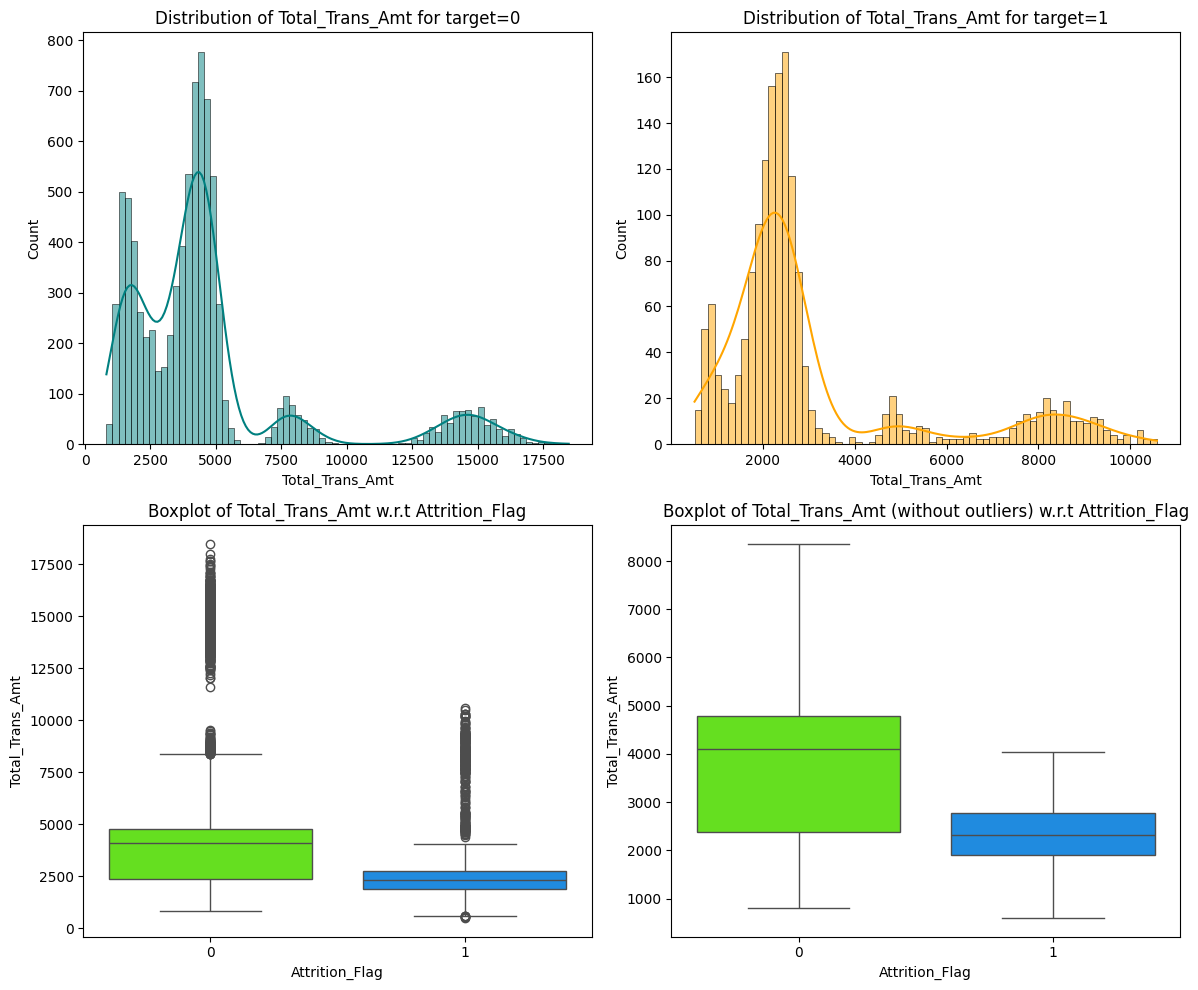

In [ ]:
distribution_plot_wrt_target(data, "Total_Trans_Amt", "Attrition_Flag")

- A lower number of transactions could potentially result in a decreased transaction amount, which may ultimately lead to customer attrition.

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

### **Observations on Total_Ct_Chng_Q4_Q1 vs Attrition_Flag**

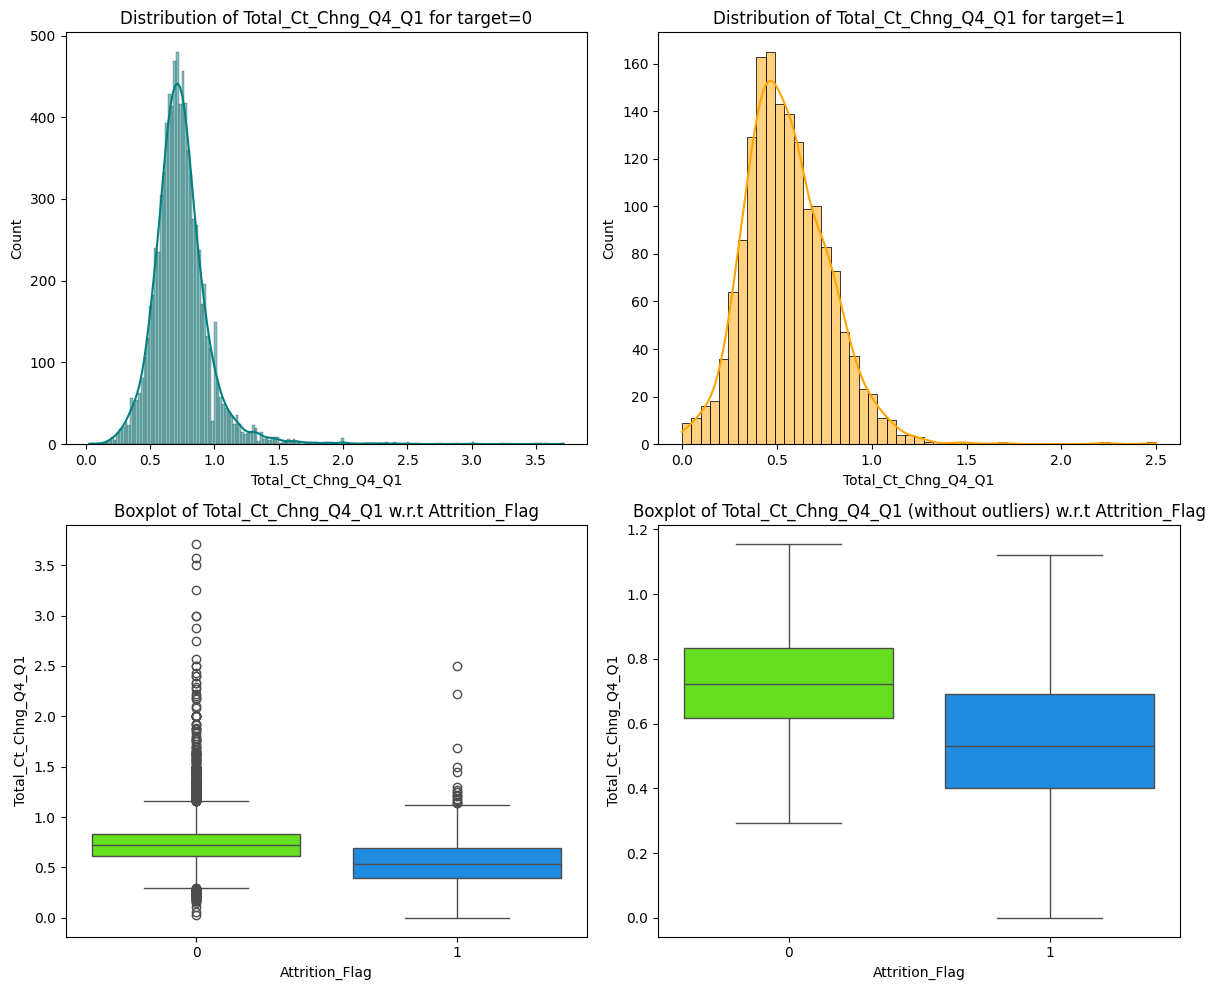

In [ ]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

- Customers who continued their service demonstrated less fluctuation from Q4 to Q1 compared to those who discontinued their service.

### **Observations on Avg_Utilization_Ratio vs Attrition_Flag**

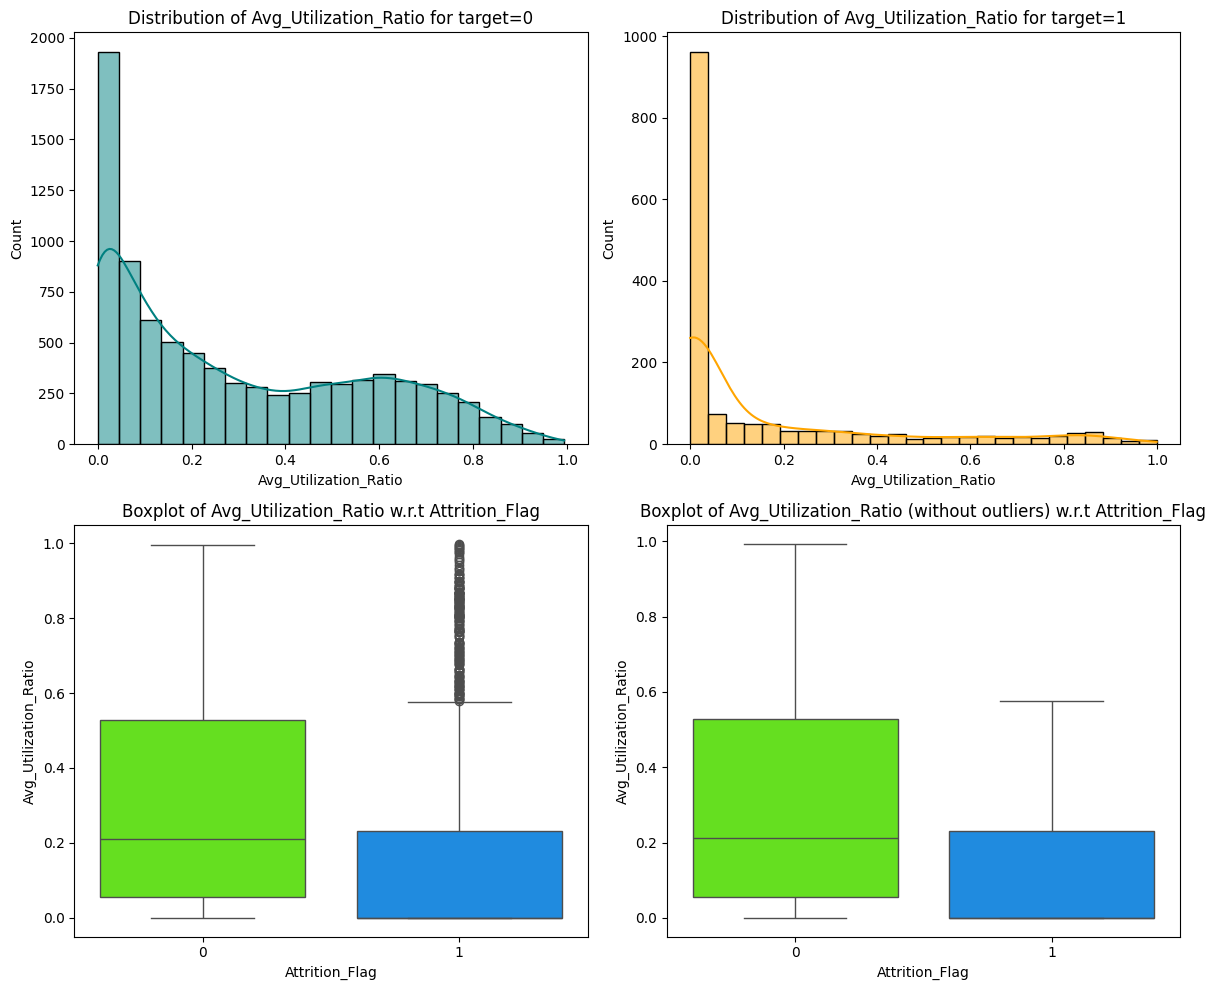

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

- Customers who make full use of their credit limit are the ones who continued their service.
- Lower usage of available credit suggests customer inactivity.

### **Observations on Attrition_Flag vs Months_on_book**

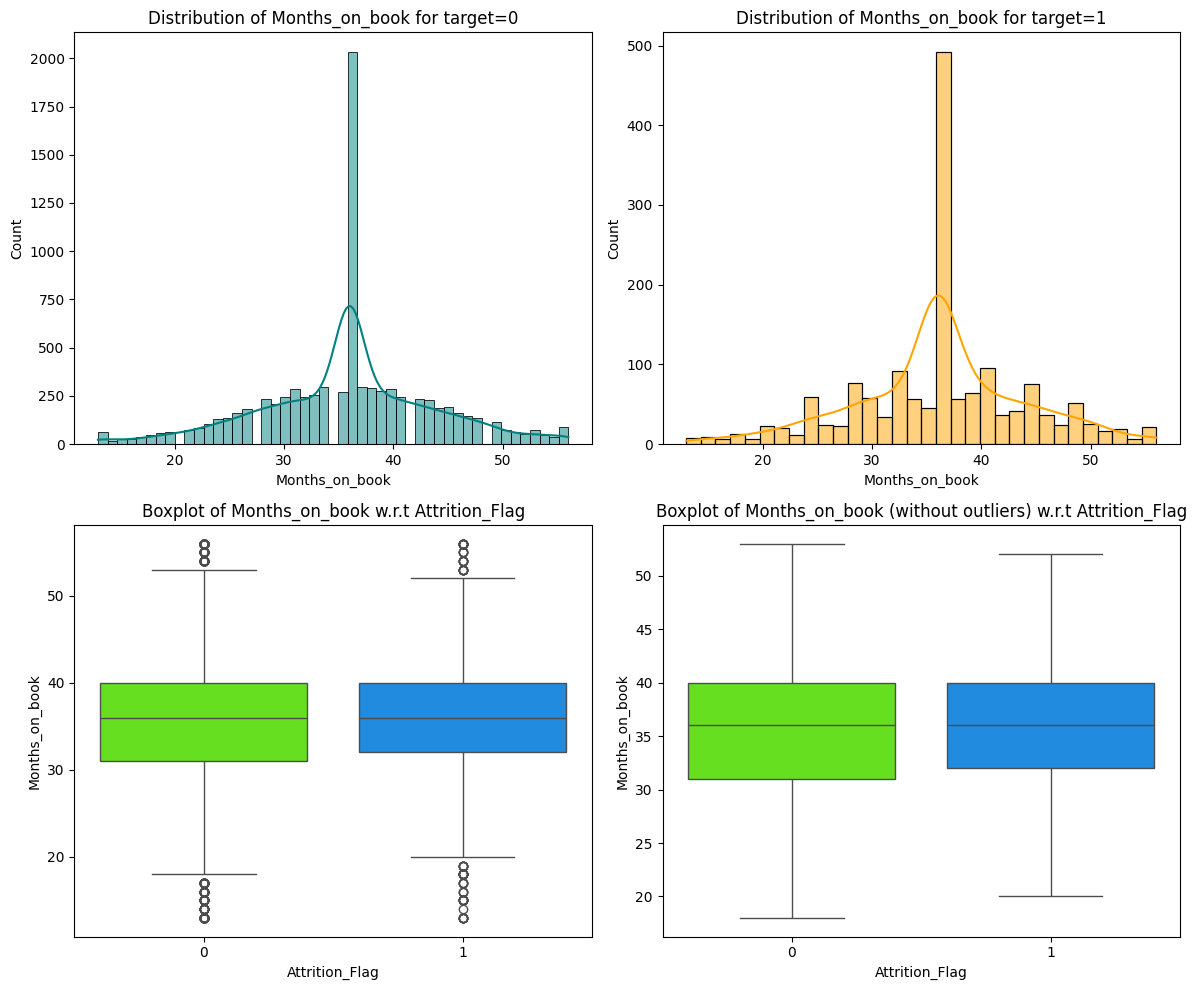

In [ ]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

- The length of a customer's relationship with the bank doesn't appear to influence attrition.

### **Observations on Attrition_Flag vs Total_Revolving_Bal**

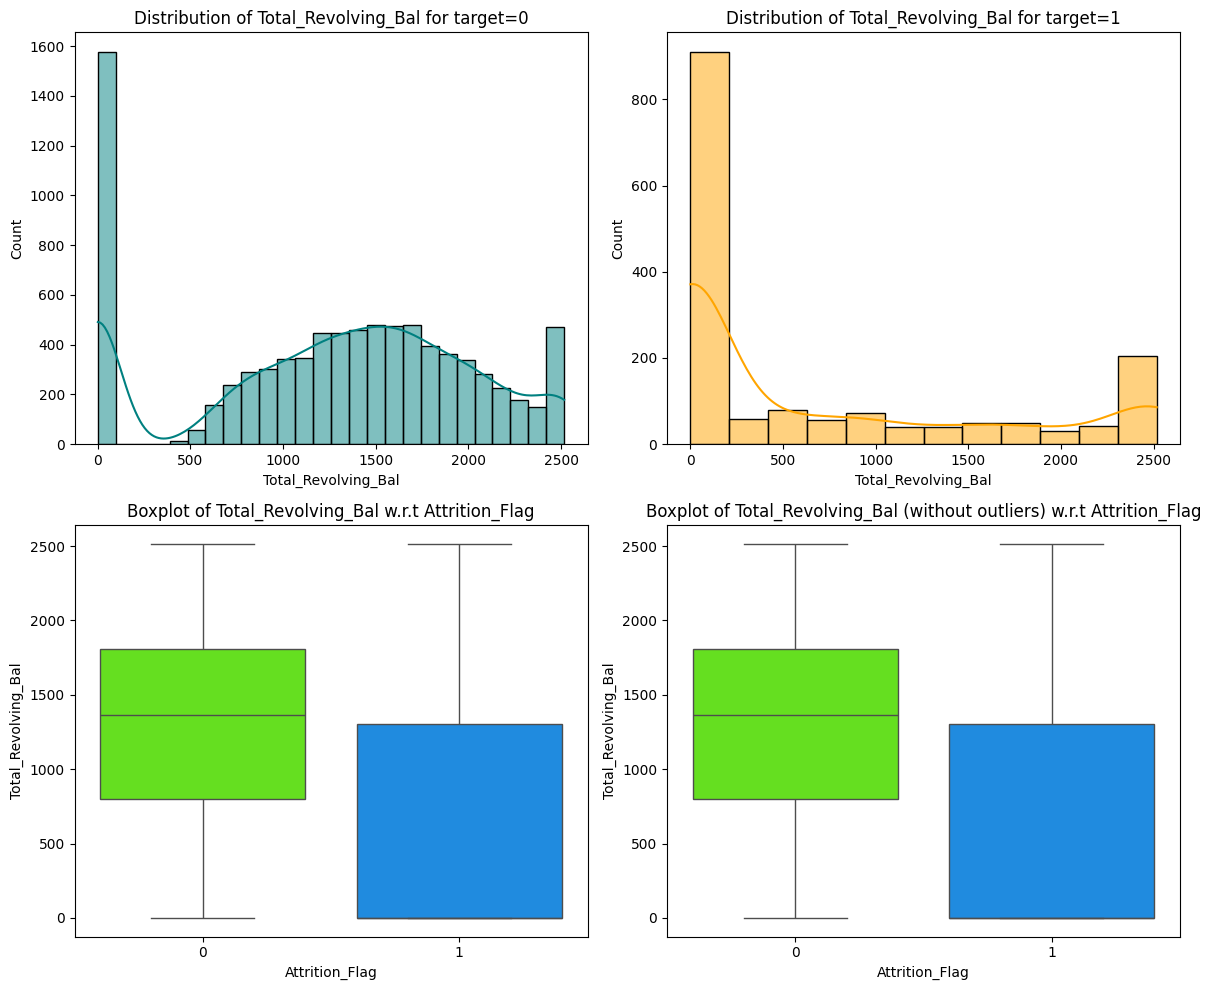

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

- Customers who have a lower total revolving balance are the ones who discontinued their service.
- It's likely that these customers have paid off their outstanding balances and chosen to terminate their credit card service.

### **Observations on Attrition_Flag vs Avg_Open_To_Buy**

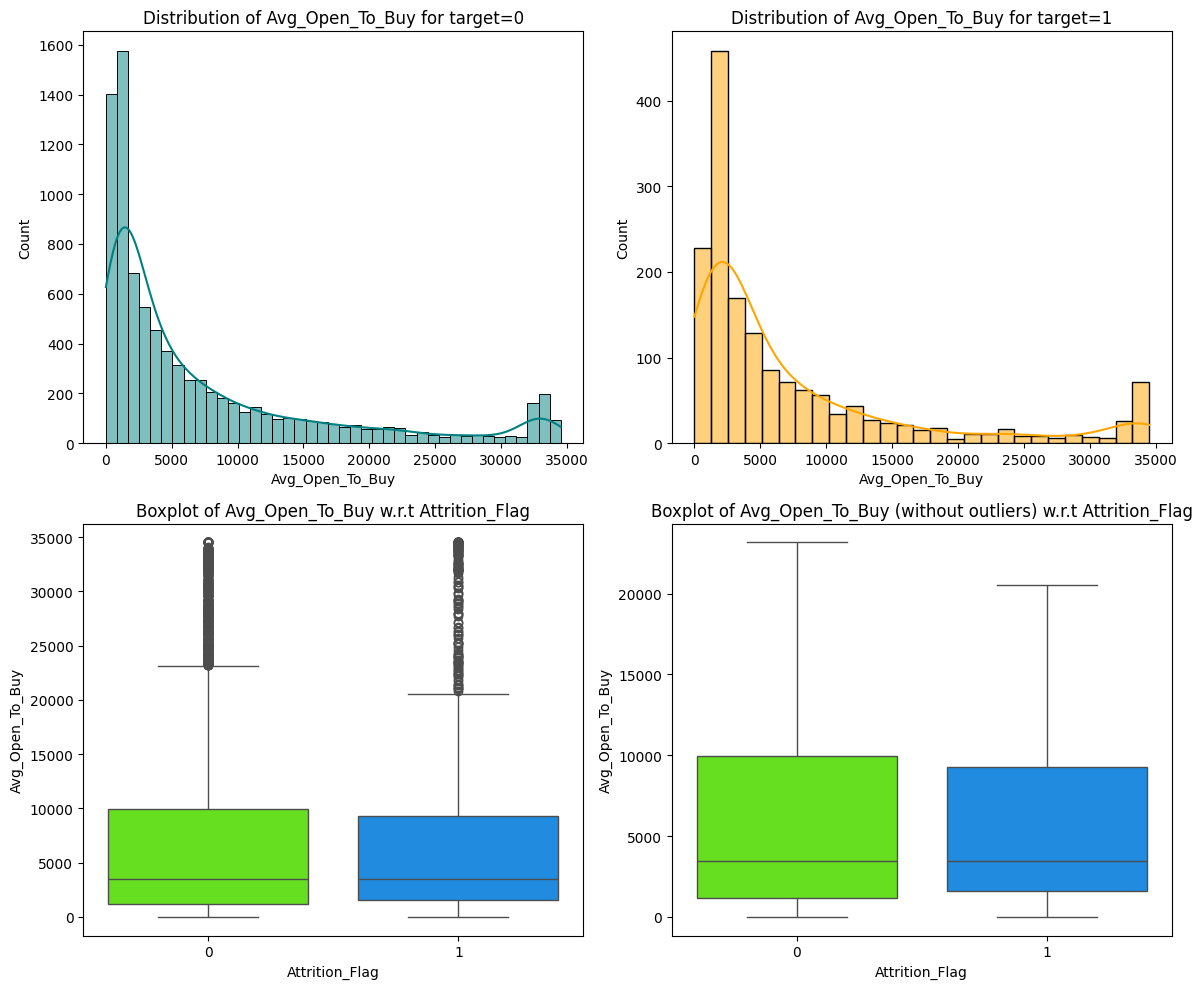

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

- The distribution between customers who discontinued their service and those who continued shows little variation.

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Data Preprocessing</span>

In [ ]:
# Filter out numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=[float, int])

# Now you can calculate the IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


### **Outlier Detection**

In [ ]:
# checking the % outliers
((numeric_data.select_dtypes(include=["float64", "int64"]) < lower) | (numeric_data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(numeric_data) * 100

,0
Attrition_Flag,16.066
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509


- Once outliers have been detected, the decision to either eliminate or adjust them is subjective and depends on the specific approach.
- In this case, we choose not to modify them because outliers are a common occurrence in real-world scenarios (such as age, total transaction amounts, transaction frequency, etc.).
- We want our model to be able to recognize and learn from these patterns.

### **Train-Test Split**

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True)

In [ ]:
data1.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y
X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Missing value imputation</span>

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
# Select columns in X_train that are of type "object" or "category"
cols = X_train.select_dtypes(include=["object", "category"])

# Loop through each column in the selected columns
for i in cols.columns:
    # Print the value counts for each unique value in the column
    print(X_train[i].value_counts())
    # Print a separator for readability
    print("*" * 30)


Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


In [ ]:
# Select columns in X_val that are of type "object" or "category"
cols = X_val.select_dtypes(include=["object", "category"])

# Loop through each column in the selected columns
for i in cols.columns:
    # Print the value counts for each unique value in the column
    print(X_val[i].value_counts())
    # Print a separator for readability
    print("*" * 30)


Gender
F    1095
M     931
Name: count, dtype: int64
******************************
Education_Level
Graduate         917
High School      404
Uneducated       306
College          199
Post-Graduate    101
Doctorate         99
Name: count, dtype: int64
******************************
Marital_Status
Married     1100
Single       770
Divorced     156
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    957
$40K - $60K       361
$80K - $120K      293
$60K - $80K       279
$120K +           136
Name: count, dtype: int64
******************************
Card_Category
Blue        1905
Silver        97
Gold          21
Platinum       3
Name: count, dtype: int64
******************************


In [ ]:
# Select columns in X_test that are of type "object" or "category"
cols = X_test.select_dtypes(include=["object", "category"])

# Loop through each column in the selected columns
for i in cols.columns:
    # Print the value counts for each unique value in the column from the training set
    print(X_train[i].value_counts())
    # Print a separator for readability
    print("*" * 30)


Gender
F    3193
M    2882
Name: count, dtype: int64
******************************
Education_Level
Graduate         2782
High School      1228
Uneducated        881
College           618
Post-Graduate     312
Doctorate         254
Name: count, dtype: int64
******************************
Marital_Status
Married     3276
Single      2369
Divorced     430
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    2783
$40K - $60K       1059
$80K - $120K       953
$60K - $80K        831
$120K +            449
Name: count, dtype: int64
******************************
Card_Category
Blue        5655
Silver       339
Gold          69
Platinum      12
Name: count, dtype: int64
******************************


### **Encoding categorical variables**

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,True,False,True,False,False,False,True,False,False,False,False,True,False,False,False
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,True,False,True,False,False,False,True,False,False,True,False,False,False,False,True
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Model Building</span>

### **Model evaluation criterion**

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

- We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
- We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
- We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# Define a function to compute different metrics to check the performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predict using the independent variables
    pred = model.predict(predictors)

    # Compute Accuracy
    acc = accuracy_score(target, pred)
    # Compute Recall
    recall = recall_score(target, pred)
    # Compute Precision
    precision = precision_score(target, pred)
    # Compute F1-score
    f1 = f1_score(target, pred)

    # Create a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    Function to plot the confusion matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predict the target using the model and predictors
    y_pred = model.predict(predictors)
    # Compute the confusion matrix
    cm = confusion_matrix(target, y_pred)
    # Format the labels to show the count and the percentage of each class
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Create a new figure for the plot
    plt.figure(figsize=(6, 4))
    # Create a heatmap of the confusion matrix
    sns.heatmap(cm, annot=labels, fmt="")
    # Set the labels of the y-axis and x-axis
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


### Model Building with Original Data

In [132]:
# Create an empty list to store all the models
models = []

# Append models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# Print the training performance
print("\n" "Training Performance:" "\n")
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Compute the recall score on the training data
    scores = recall_score(y_train, model.predict(X_train))
    # Print the model name and the recall score
    print("{}: {}".format(name, scores))

# Print the validation performance
print("\n" "Validation Performance:" "\n")
for name, model in models:
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Compute the recall score on the validation data
    scores_val = recall_score(y_val, model.predict(X_val))
    # Print the model name and the recall score
    print("{}: {}".format(name, scores_val))



Training Performance:

Logistic regression: 0.41700819672131145
Bagging: 0.985655737704918
Random forest: 1.0
GBM: 0.875
Adaboost: 0.826844262295082
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.48773006134969327
Bagging: 0.8128834355828221
Random forest: 0.7975460122699386
GBM: 0.8558282208588958
Adaboost: 0.852760736196319
Xgboost: 0.901840490797546
dtree: 0.8159509202453987


- Xgboost has the best performance on the validation followed by GBM and Adaboost

### Model Building - Oversampled Data

In [133]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 976
Before Oversampling, counts of label 'No': 5099 

After Oversampling, counts of label 'Yes': 5099
After Oversampling, counts of label 'No': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [134]:
# Create an empty list to store all the models
models = []

# Append models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# Print the training performance
print("\n" "Training Performance:" "\n")
for name, model in models:
    # Fit the model on the oversampled training data
    model.fit(X_train_over, y_train_over)
    # Compute the recall score on the oversampled training data
    scores = recall_score(y_train_over, model.predict(X_train_over))
    # Print the model name and the recall score
    print("{}: {}".format(name, scores))

# Print the validation performance
print("\n" "Validation Performance:" "\n")
for name, model in models:
    # Fit the model on the oversampled training data
    model.fit(X_train_over, y_train_over)
    # Compute the recall score on the validation data
    scores = recall_score(y_val, model.predict(X_val))
    # Print the model name and the recall score
    print("{}: {}".format(name, scores))



Training Performance:

Logistic regression: 0.8021180623651697
Bagging: 0.9976465973720338
Random forest: 1.0
GBM: 0.9792116101196313
Adaboost: 0.964698960580506
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.7791411042944786
Bagging: 0.8619631901840491
Random forest: 0.8619631901840491
GBM: 0.9049079754601227
Adaboost: 0.901840490797546
Xgboost: 0.9294478527607362
dtree: 0.8650306748466258


- Adaboost has the best performance on validation followed by XGB

### Model Building - Undersampled Data

In [135]:
# Instantiate the RandomUnderSampler with a specific random state for reproducibility
rus = RandomUnderSampler(random_state=1)

# Fit the RandomUnderSampler on the training data and perform undersampling
# This will return the undersampled feature set (X_train_un) and target variable (y_train_un)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


In [136]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [137]:
# Create an empty list to store all the models
models = []

# Append models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# Print the training performance
print("\n" "Training Performance:" "\n")
for name, model in models:
    # Fit the model on the undersampled training data
    model.fit(X_train_un, y_train_un)
    # Compute the recall score on the undersampled training data
    scores = recall_score(y_train_un, model.predict(X_train_un))
    # Print the model name and the recall score
    print("{}: {}".format(name, scores))

# Print the validation performance
print("\n" "Validation Performance:" "\n")
for name, model in models:
    # Fit the model on the undersampled training data
    model.fit(X_train_un, y_train_un)
    # Compute the recall score on the validation data
    scores = recall_score(y_val, model.predict(X_val))
    # Print the model name and the recall score
    print("{}: {}".format(name, scores))



Training Performance:

Logistic regression: 0.8217213114754098
Bagging: 0.9907786885245902
Random forest: 1.0
GBM: 0.9805327868852459
Adaboost: 0.9528688524590164
Xgboost: 1.0
dtree: 1.0

Validation Performance:

Logistic regression: 0.8251533742331288
Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
GBM: 0.9570552147239264
Adaboost: 0.9601226993865031
Xgboost: 0.9693251533742331
dtree: 0.9202453987730062


- According to the validation performance, Adaboost outperforms the other models, with Xgboost coming in as the second best.

### **Which models should be tuned?**
- XGBoost, AdaBoost and Gradient boosting models have consistent and good performance for all 3 datasets. So, we will tune these 3 models.
- We will tune these 3 models using undersampled data as it is giving better results
- Sometimes models might overfit after undersampling and oversampling, so it's better to tune models with both undersampled data and original data

### **Tuning AdaBoost using original data**

In [138]:
%%time

# Define the model as AdaBoostClassifier with a specific random state for reproducibility
Model = AdaBoostClassifier(random_state=1)

# Define the parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),  # Number of estimators
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],  # Learning rate
    "base_estimator": [  # The base estimator from which the boosted ensemble is built
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Define the type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Call RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# Fit parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

# Print the best parameters and the corresponding score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8637205651491365:
CPU times: user 4.78 s, sys: 541 ms, total: 5.32 s
Wall time: 3min 31s


In [147]:
# Initialize the AdaBoost classifier with specific parameters
tuned_adb_od = AdaBoostClassifier(
    random_state=1,  # Ensures reproducibility of results
    n_estimators=90,  # Number of boosting stages to be run
    learning_rate=0.2,  # Learning rate shrinks the contribution of each classifier
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),  # Base estimator is a decision tree with max depth of 3
)

# Fit the model to the training data
tuned_adb_od.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [148]:
# Evaluate the performance of the tuned AdaBoost classifier on the training data
adb_od_train = model_performance_classification_sklearn(tuned_adb_od, X_train, y_train)

# Display the performance metrics
adb_od_train


,Accuracy,Recall,Precision,F1
0,0.992,0.967,0.982,0.975


In [149]:
# Evaluate the performance of the tuned AdaBoost classifier on the validation data
adb_od_val = model_performance_classification_sklearn(tuned_adb_od,  X_val, y_val)

# Display the performance metrics
adb_od_val

,Accuracy,Recall,Precision,F1
0,0.969,0.871,0.934,0.902


### **Tuning Ada Boost using undersampled data**

In [142]:
# Measure the time taken to execute the following code block
%%time

# Defining the AdaBoost model with a fixed random state for reproducibility
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": np.arange(10, 110, 10),  # Number of boosting stages to be run
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],  # Learning rates to test
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),  # Decision tree with max depth of 1
        DecisionTreeClassifier(max_depth=2, random_state=1),  # Decision tree with max depth of 2
        DecisionTreeClassifier(max_depth=3, random_state=1),  # Decision tree with max depth of 3
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV to find the best parameters
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_jobs=-1,  # Use all available cores
    n_iter=50,  # Number of parameter settings that are sampled
    scoring=scorer,  # Scoring metric to use
    cv=5,  # 5-fold cross-validation
    random_state=1  # Ensures reproducibility of results
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Print the best parameters and the corresponding CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.949811616954474:
CPU times: user 3.24 s, sys: 292 ms, total: 3.53 s
Wall time: 1min 40s


In [150]:
# Initialize the AdaBoost classifier with specific parameters
tuned_adb_usd = AdaBoostClassifier(
    random_state=1,  # Ensures reproducibility of results
    n_estimators=90,  # Number of boosting stages to be run
    learning_rate=0.2,  # Learning rate shrinks the contribution of each classifier
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),  # Base estimator is a decision tree with max depth of 3
)

# Fit the model to the unbalanced training data
tuned_adb_usd.fit(X_train_un, y_train_un)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [151]:
# Checking model's performance on training set
adb_usd_train = model_performance_classification_sklearn(
    tuned_adb_usd, X_train_un, y_train_un
)
adb_usd_train

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [152]:
# Checking model's performance on validation set
adb_usd_val = model_performance_classification_sklearn(tuned_adb_usd, X_val, y_val)
adb_usd_val

,Accuracy,Recall,Precision,F1
0,0.935,0.963,0.724,0.826


### **Tuning Gradient Boosting using undersampled data**

In [156]:
%%time

# Creating the Gradient Boosting model with a fixed random state for reproducibility
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    # Initial estimators to try: AdaBoost and DecisionTree
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    # Number of boosting stages to be run
    "n_estimators": np.arange(75, 150, 25),
    # Learning rate shrinks the contribution of each tree
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    # Fraction of samples used for fitting the individual base learners
    "subsample": [0.5, 0.7, 1],
    # Number of features to consider when looking for the best split
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV with the model and parameter grid
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Printing the best parameters and corresponding CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9559340659340659:
CPU times: user 3.1 s, sys: 340 ms, total: 3.44 s
Wall time: 1min 47s


In [157]:
# Defining the tuned Gradient Boosting model with specific hyperparameters
tuned_usd_gbm = GradientBoostingClassifier(
    random_state=1,  # Ensures reproducibility
    subsample=0.7,  # Fraction of samples used for fitting the individual base learners
    n_estimators=125,  # Number of boosting stages to be run
    max_features=0.7,  # Number of features to consider when looking for the best split
    learning_rate=0.2,  # Shrinks the contribution of each tree
    init=AdaBoostClassifier(random_state=1),  # Initial estimator
)

# Fitting the model to the training data
tuned_usd_gbm.fit(X_train_un, y_train_un)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [159]:
# Checking model's performance on training set
gbm_usd_train = model_performance_classification_sklearn(
    tuned_usd_gbm, X_train_un, y_train_un
)
gbm_usd_train

,Accuracy,Recall,Precision,F1
0,0.996,0.999,0.994,0.996


In [160]:
# Checking model's performance on validation set
gbm_usd_val = model_performance_classification_sklearn(tuned_usd_gbm, X_val, y_val)
gbm_usd_val

,Accuracy,Recall,Precision,F1
0,0.944,0.957,0.759,0.847


### **Tuning Gradient Boosting using original data**

In [146]:
%%time

# Defining the Gradient Boosting model with a fixed random state for reproducibility
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    # Initial estimators to try: AdaBoost and DecisionTree
    "init": [AdaBoostClassifier(random_state=1), DecisionTreeClassifier(random_state=1)],
    # Number of boosting stages to be run
    "n_estimators": np.arange(75, 150, 25),
    # Learning rate shrinks the contribution of each tree
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    # Fraction of samples used for fitting the individual base learners
    "subsample": [0.5, 0.7, 1],
    # Number of features to consider when looking for the best split
    "max_features": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV with the model and parameter grid
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# Printing the best parameters and corresponding CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.849361590790162:
CPU times: user 6.12 s, sys: 661 ms, total: 6.78 s
Wall time: 4min 7s


In [153]:
# Defining the tuned Gradient Boosting model with specific hyperparameters
tuned_od_gbm = GradientBoostingClassifier(
    random_state=1,  # Ensures reproducibility
    subsample=0.7,  # Fraction of samples used for fitting the individual base learners
    n_estimators=125,  # Number of boosting stages to be run
    max_features=0.7,  # Number of features to consider when looking for the best split
    learning_rate=0.2,  # Shrinks the contribution of each tree
    init=AdaBoostClassifier(random_state=1),  # Initial estimator
)

# Fitting the model to the training data
tuned_od_gbm.fit(X_train, y_train)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [154]:
# Checking model's performance on the training set
gbm_od_train = model_performance_classification_sklearn(tuned_od_gbm, X_train, y_train)

# Displaying the performance metrics
gbm_od_train


,Accuracy,Recall,Precision,F1
0,0.988,0.949,0.975,0.962


In [155]:
# Checking model's performance on validation set
gbm_od_val = model_performance_classification_sklearn(tuned_od_gbm, X_val, y_val)
gbm_od_val

,Accuracy,Recall,Precision,F1
0,0.969,0.883,0.923,0.903


### **Tuning XGBoost Model with Undersampled data**

In [161]:
%%time

# Defining the XGBoost model with a fixed random state for reproducibility and evaluation metric set to logloss
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    # Number of boosting stages to be run
    'n_estimators': np.arange(50, 300, 50),
    # Balancing the positive class in the dataset
    'scale_pos_weight': [0, 1, 2, 5, 10],
    # Learning rate shrinks the contribution of each tree
    'learning_rate': [0.01, 0.1, 0.2, 0.05],
    # Minimum loss reduction required to make a further partition on a leaf node
    'gamma': [0, 1, 3, 5],
    # Fraction of samples used for fitting the individual base learners
    'subsample': [0.7, 0.8, 0.9, 1]
}

from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV with the model and parameter grid
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

# Printing the best parameters and corresponding CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 5} with CV score=0.987723704866562:
CPU times: user 2.07 s, sys: 190 ms, total: 2.26 s
Wall time: 52.4 s


In [162]:
# Defining the tuned XGBoost model with specific hyperparameters
tuned_usd_xgb = XGBClassifier(
    random_state=1,  # Ensures reproducibility
    eval_metric="logloss",  # Evaluation metric for the model
    subsample=0.9,  # Fraction of samples used for fitting the individual base learners
    scale_pos_weight=10,  # Balancing the positive class in the dataset
    n_estimators=200,  # Number of boosting stages to be run
    learning_rate=0.01,  # Shrinks the contribution of each tree
    gamma=1,  # Minimum loss reduction required to make a further partition on a leaf node
)

# Fitting the model to the training data
tuned_usd_xgb.fit(X_train_un, y_train_un)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [163]:
# Checking model's performance on train set
xgb_usd_train = model_performance_classification_sklearn(tuned_usd_xgb, X_train_un, y_train_un)
xgb_usd_train

,Accuracy,Recall,Precision,F1
0,0.918,1.000,0.859,0.924


In [173]:
# Checking model's performance on validation set
xgb_usd_val = model_performance_classification_sklearn(tuned_usd_xgb, X_val, y_val)
xgb_usd_val

,Accuracy,Recall,Precision,F1
0,0.819,0.994,0.471,0.639


### **Tuning XGBoost Model with Original data**

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [164]:
%%time

# Defining the XGBoost model with a fixed random state for reproducibility and evaluation metric set to logloss
Model = XGBClassifier(random_state=1, eval_metric='logloss')

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    # Number of boosting stages to be run
    'n_estimators': np.arange(50, 300, 50),
    # Balancing the positive class in the dataset
    'scale_pos_weight': [0, 1, 2, 5, 10],
    # Learning rate shrinks the contribution of each tree
    'learning_rate': [0.01, 0.1, 0.2, 0.05],
    # Minimum loss reduction required to make a further partition on a leaf node
    'gamma': [0, 1, 3, 5],
    # Fraction of samples used for fitting the individual base learners
    'subsample': [0.7, 0.8, 0.9, 1]
}

from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV with the model and parameter grid
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs=-1, scoring=scorer, cv=5, random_state=1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

# Printing the best parameters and corresponding CV score
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.01, 'gamma': 1} with CV score=0.942611198325484:
CPU times: user 4.22 s, sys: 351 ms, total: 4.57 s
Wall time: 1min 26s


In [166]:
# Defining the tuned XGBoost model with specific hyperparameters
tuned_od_xgb = XGBClassifier(
    random_state=1,  # Ensures reproducibility
    eval_metric="logloss",  # Evaluation metric for the model
    subsample=0.9,  # Fraction of samples used for fitting the individual base learners
    scale_pos_weight=10,  # Balancing the positive class in the dataset
    n_estimators=200,  # Number of boosting stages to be run
    learning_rate=0.01,  # Shrinks the contribution of each tree
    gamma=1,  # Minimum loss reduction required to make a further partition on a leaf node
)

# Fitting the model to the training data
tuned_od_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [168]:
# Checking model's performance on training set
xgb_od_train = model_performance_classification_sklearn(tuned_od_xgb, X_train, y_train)
xgb_od_train

,Accuracy,Recall,Precision,F1
0,0.940,1.000,0.729,0.844


In [169]:
# Checking model's performance on validation set
xgb_od_val = model_performance_classification_sklearn(tuned_od_xgb, X_val, y_val)
xgb_od_val

,Accuracy,Recall,Precision,F1
0,0.929,0.957,0.706,0.812


<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Model Comparison and Final Model Selection</span>

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [170]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        xgb_od_train.T,
        xgb_usd_train.T,
        gbm_od_train.T,
        gbm_usd_train.T,
        adb_od_train.T,
        adb_usd_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.940,0.918,0.988,0.996,0.992,1.000
Recall,1.000,1.000,0.949,0.999,0.967,1.000
Precision,0.729,0.859,0.975,0.994,0.982,1.000
F1,0.844,0.924,0.962,0.996,0.975,1.000


In [175]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        xgb_od_val.T,
        xgb_usd_val.T,
        gbm_od_val.T,
        gbm_usd_val.T,
        adb_od_val.T,
        adb_usd_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "XGBoost trained with Undersampled data",
    "XGBoost trained with Original data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Original data",
    "AdaBoost trained with Undersampled data",
    "AdaBoost trained with Original data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost trained with Undersampled data,XGBoost trained with Original data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Original data,AdaBoost trained with Undersampled data,AdaBoost trained with Original data
Accuracy,0.929,0.819,0.969,0.944,0.969,0.935
Recall,0.957,0.994,0.883,0.957,0.871,0.963
Precision,0.706,0.471,0.923,0.759,0.934,0.724
F1,0.812,0.639,0.903,0.847,0.902,0.826


- Gradient boosting model trained with original data has generalised performance, so let's consider it as the best model.

**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [176]:
# Let's check the performance on test set
gbm_od_test = model_performance_classification_sklearn(tuned_od_gbm, X_test, y_test)
gbm_od_test

,Accuracy,Recall,Precision,F1
0,0.975,0.914,0.931,0.922


- The model has given good performance on test set.

### **Feature Importance**

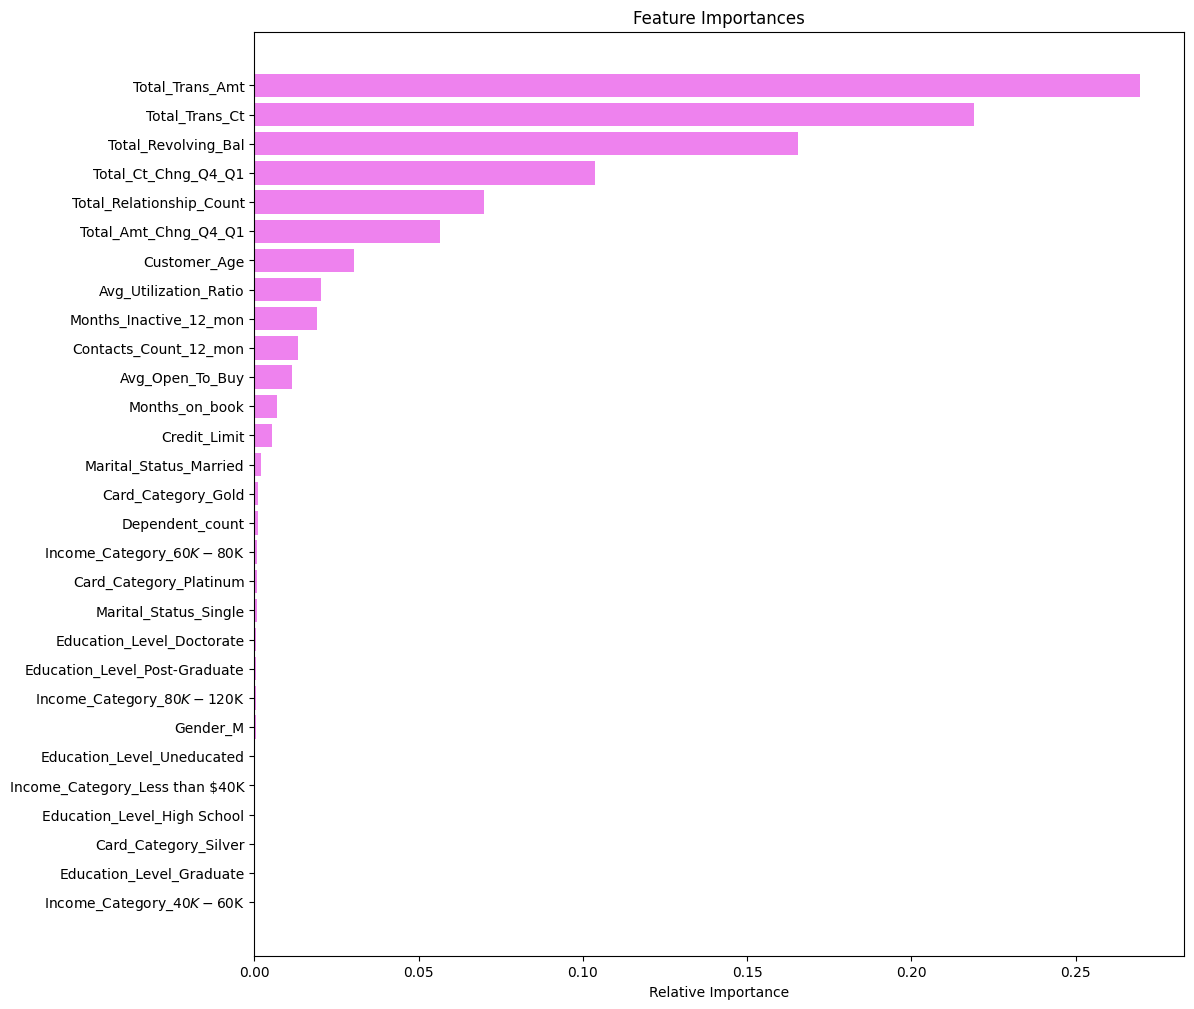

In [177]:
# Extracting feature names from the training data
feature_names = X_train.columns

# Getting the feature importances from the tuned Gradient Boosting model
importances = tuned_od_gbm.feature_importances_

# Sorting the feature importances in ascending order
indices = np.argsort(importances)

# Creating a figure for the plot
plt.figure(figsize=(12, 12))

# Setting the title of the plot
plt.title("Feature Importances")

# Creating a horizontal bar plot of the feature importances
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")

# Setting the y-ticks to the feature names
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

# Labeling the x-axis
plt.xlabel("Relative Importance")

# Displaying the plot
plt.show()


- The most crucial factor in predicting credit card churn is Total_Trans_Amt, followed by Total_Revolving_Bal, Total_Trans_Ct, Total_Relationship_Count, and Total_Ct_Chng_Q4_Q1.

<span style="font-family: Helvetica; font-weight:bold;font-size:2.5em;color:navy">Business Insights and Conclusions</span>


We have successfully developed a predictive model that the bank can utilize to:

  - Identify customers at risk of attrition.

  - Determine the key factors driving customer attrition.

  - Implement effective retention strategies based on these insights.

### **Key Factors Influencing Attrition:**
- Total_Trans_Ct: Fewer transactions per year lead to higher attrition. To boost card usage, the bank can offer incentives like cashback and special discounts to encourage more frequent use.
- Total_Revolving_Bal: Customers with lower revolving balances tend to leave, likely after clearing their dues. The bank should seek feedback from these customers to understand their reasons for leaving.
- Total_Trans_Amt: Lower transaction amounts correlate with higher attrition. Offering promotions on higher-value purchases can benefit both the bank and its customers.
- Total_Relationship_Count: Customers using only 1 or 2 bank products account for about 55% of attrition. The bank should investigate issues with these products and improve customer support and transparency to retain these customers.

### **Additional Insights:**
- Targeting Female Customers: Female customers, who tend to make more frequent and higher-value transactions, should be the focus of marketing campaigns. Increasing their credit limits could also be beneficial.
- Months_Inactive: Inactivity for 2-4 months is a significant contributor to attrition. Automated messages about monthly activity, new offers, or services can help re-engage these customers.
- Customer Interactions: High attrition rates among customers who frequently contact the bank suggest unresolved issues. Implementing a feedback system to ensure customer satisfaction with resolutions can help address this problem.
